# Tuto pour la prédicition de l'âge uniquement

In [9]:
#imports
import pandas as pd
import numpy as np
import os
import fnmatch
from random import shuffle
import cv2

os.chdir("/home/amyplant/Face_recognition/Age_Gender_Recognition/from_scratch/utkcropped")

### Création du dataframe

Ici j'ai téléchargé le dataframe qui se trouve sur ce lien https://www.kaggle.com/datasets/abhikjha/utk-face-cropped/data, et il faut que ton notebook soit dans le même dossier que le dossier utkcropped

In [10]:
for nom_fichier in os.listdir():
    print(nom_fichier)

40_0_0_20170116221901075.jpg.chip.jpg
37_0_1_20170117143125092.jpg.chip.jpg
39_0_3_20170119203900686.jpg.chip.jpg
53_0_1_20170104172747354.jpg.chip.jpg
1_1_0_20170109192015845.jpg.chip.jpg
29_1_1_20170112230631076.jpg.chip.jpg
39_0_0_20170113134725338.jpg.chip.jpg
29_0_0_20170117120426927.jpg.chip.jpg
31_1_1_20170116222335750.jpg.chip.jpg
1_0_0_20170110213206043.jpg.chip.jpg
49_1_0_20170104183921310.jpg.chip.jpg
37_0_3_20170119193226433.jpg.chip.jpg
34_0_1_20170117010655969.jpg.chip.jpg
31_1_3_20170117170731113.jpg.chip.jpg
39_0_0_20170104181448317.jpg.chip.jpg
50_0_0_20170111200749613.jpg.chip.jpg
38_0_0_20170105184043687.jpg.chip.jpg
34_0_1_20170113141901691.jpg.chip.jpg
32_0_0_20170117173203012.jpg.chip.jpg
26_1_1_20170116223109423.jpg.chip.jpg
26_1_2_20170116182203278.jpg.chip.jpg
68_0_1_20170117194555228.jpg.chip.jpg
69_1_0_20170110141155497.jpg.chip.jpg
55_0_0_20170117190545195.jpg.chip.jpg
26_1_1_20170113000647442.jpg.chip.jpg
75_1_0_20170110181054680.jpg.chip.jpg
26_1_1_2017011

In [11]:
# Liste pour stocker les noms des images
liste_noms_images = []

for nom_fichier in os.listdir():
    if nom_fichier.endswith('.jpg') or nom_fichier.endswith('.jpeg') or nom_fichier.endswith('.png'):
        liste_noms_images.append(nom_fichier)

In [12]:
print(liste_noms_images)

['40_0_0_20170116221901075.jpg.chip.jpg', '37_0_1_20170117143125092.jpg.chip.jpg', '39_0_3_20170119203900686.jpg.chip.jpg', '53_0_1_20170104172747354.jpg.chip.jpg', '1_1_0_20170109192015845.jpg.chip.jpg', '29_1_1_20170112230631076.jpg.chip.jpg', '39_0_0_20170113134725338.jpg.chip.jpg', '29_0_0_20170117120426927.jpg.chip.jpg', '31_1_1_20170116222335750.jpg.chip.jpg', '1_0_0_20170110213206043.jpg.chip.jpg', '49_1_0_20170104183921310.jpg.chip.jpg', '37_0_3_20170119193226433.jpg.chip.jpg', '34_0_1_20170117010655969.jpg.chip.jpg', '31_1_3_20170117170731113.jpg.chip.jpg', '39_0_0_20170104181448317.jpg.chip.jpg', '50_0_0_20170111200749613.jpg.chip.jpg', '38_0_0_20170105184043687.jpg.chip.jpg', '34_0_1_20170113141901691.jpg.chip.jpg', '32_0_0_20170117173203012.jpg.chip.jpg', '26_1_1_20170116223109423.jpg.chip.jpg', '26_1_2_20170116182203278.jpg.chip.jpg', '68_0_1_20170117194555228.jpg.chip.jpg', '69_1_0_20170110141155497.jpg.chip.jpg', '55_0_0_20170117190545195.jpg.chip.jpg', '26_1_1_201701130

In [14]:
# Définition des listes pour stocker les données
liste_age = []
liste_genre = []
liste_ethnicite = []
liste_noms_images = []
liste_images_numpy = []

for nom_fichier in os.listdir():
    print(nom_fichier)
    if nom_fichier.endswith('.jpg'):
        parties = nom_fichier.split('_')
        if len(parties) == 4 and parties[3].endswith('.jpg'):
            age = int(parties[0])
            genre = int(parties[1])
            ethnicite = int(parties[2])

            liste_age.append(age)
            liste_genre.append(genre)
            liste_ethnicite.append(ethnicite)
            liste_noms_images.append(nom_fichier)

            chemin_image = os.path.join(os.getcwd(), nom_fichier)
            image = cv2.imread(chemin_image)
            if image is not None:
                liste_images_numpy.append(image)

40_0_0_20170116221901075.jpg.chip.jpg
37_0_1_20170117143125092.jpg.chip.jpg
39_0_3_20170119203900686.jpg.chip.jpg
53_0_1_20170104172747354.jpg.chip.jpg
1_1_0_20170109192015845.jpg.chip.jpg
29_1_1_20170112230631076.jpg.chip.jpg
39_0_0_20170113134725338.jpg.chip.jpg
29_0_0_20170117120426927.jpg.chip.jpg
31_1_1_20170116222335750.jpg.chip.jpg
1_0_0_20170110213206043.jpg.chip.jpg
49_1_0_20170104183921310.jpg.chip.jpg
37_0_3_20170119193226433.jpg.chip.jpg
34_0_1_20170117010655969.jpg.chip.jpg
31_1_3_20170117170731113.jpg.chip.jpg
39_0_0_20170104181448317.jpg.chip.jpg
50_0_0_20170111200749613.jpg.chip.jpg
38_0_0_20170105184043687.jpg.chip.jpg
34_0_1_20170113141901691.jpg.chip.jpg
32_0_0_20170117173203012.jpg.chip.jpg
26_1_1_20170116223109423.jpg.chip.jpg
26_1_2_20170116182203278.jpg.chip.jpg
68_0_1_20170117194555228.jpg.chip.jpg
69_1_0_20170110141155497.jpg.chip.jpg
55_0_0_20170117190545195.jpg.chip.jpg
26_1_1_20170113000647442.jpg.chip.jpg
75_1_0_20170110181054680.jpg.chip.jpg
26_1_1_2017011

37_0_1_20170117164349761.jpg.chip.jpg
21_1_1_20170112230510269.jpg.chip.jpg
10_1_1_20170110225155603.jpg.chip.jpg
76_0_1_20170116205605555.jpg.chip.jpg
54_0_3_20170119201443709.jpg.chip.jpg
24_1_2_20170116163049260.jpg.chip.jpg
27_0_0_20170117175631490.jpg.chip.jpg
25_0_1_20170117195045410.jpg.chip.jpg
37_0_3_20170119175010298.jpg.chip.jpg
50_1_4_20170117203355296.jpg.chip.jpg
36_0_1_20170116193844474.jpg.chip.jpg
22_0_2_20170104021348142.jpg.chip.jpg
26_1_1_20170116022013916.jpg.chip.jpg
92_1_0_20170110133307879.jpg.chip.jpg
83_1_0_20170120230456826.jpg.chip.jpg
27_0_1_20170117013654319.jpg.chip.jpg
9_0_0_20170110220130810.jpg.chip.jpg
46_0_3_20170119204816695.jpg.chip.jpg
60_1_0_20170110122826993.jpg.chip.jpg
61_0_0_20170117194413929.jpg.chip.jpg
26_1_2_20170117154930236.jpg.chip.jpg
35_1_4_20170117200719931.jpg.chip.jpg
4_0_4_20161221202651241.jpg.chip.jpg
47_0_0_20170104210614252.jpg.chip.jpg
26_0_4_20170117153015117.jpg.chip.jpg
20_1_1_20170117132642224.jpg.chip.jpg
35_0_2_2017011

23_0_0_20170117134919191.jpg.chip.jpg
38_0_0_20170117120920017.jpg.chip.jpg
29_0_3_20170119195113147.jpg.chip.jpg
32_0_1_20170113142343044.jpg.chip.jpg
32_1_0_20170103182605514.jpg.chip.jpg
63_0_0_20170113210319862.jpg.chip.jpg
38_0_0_20170105172811910.jpg.chip.jpg
23_1_3_20170104222321688.jpg.chip.jpg
36_1_0_20170108230047374.jpg.chip.jpg
40_1_4_20170117200930685.jpg.chip.jpg
10_0_0_20170104013211746.jpg.chip.jpg
56_1_2_20170107213838566.jpg.chip.jpg
35_1_0_20170113001111066.jpg.chip.jpg
58_0_0_20170120222516888.jpg.chip.jpg
32_1_0_20170117182456548.jpg.chip.jpg
19_0_0_20170117185159337.jpg.chip.jpg
36_1_0_20170113010354991.jpg.chip.jpg
49_1_1_20170113184406976.jpg.chip.jpg
42_0_3_20170119204424727.jpg.chip.jpg
30_0_1_20170117123839619.jpg.chip.jpg
1_0_0_20170103210548852.jpg.chip.jpg
31_0_1_20170117203020591.jpg.chip.jpg
50_0_1_20170113184224648.jpg.chip.jpg
1_0_1_20170110213647161.jpg.chip.jpg
1_0_2_20161219142409225.jpg.chip.jpg
5_1_3_20161220145130080.jpg.chip.jpg
51_0_0_201701111

11_0_0_20170110220518578.jpg.chip.jpg
55_0_3_20170119201651189.jpg.chip.jpg
26_0_4_20170117195846957.jpg.chip.jpg
58_1_0_20170109150657263.jpg.chip.jpg
50_0_0_20170104210147596.jpg.chip.jpg
27_1_2_20170105161505810.jpg.chip.jpg
24_0_0_20170104004125063.jpg.chip.jpg
34_1_0_20170117182633942.jpg.chip.jpg
26_0_1_20170116182126537.jpg.chip.jpg
75_0_0_20170111202232554.jpg.chip.jpg
25_1_3_20170119150911238.jpg.chip.jpg
60_0_1_20170119204250215.jpg.chip.jpg
63_0_0_20170120225701457.jpg.chip.jpg
52_0_1_20170111200619762.jpg.chip.jpg
37_0_0_20170117140009463.jpg.chip.jpg
32_0_1_20170113183229559.jpg.chip.jpg
42_0_1_20170113184124287.jpg.chip.jpg
29_1_4_20170103230245713.jpg.chip.jpg
28_0_1_20170117123923204.jpg.chip.jpg
65_0_1_20170117172856561.jpg.chip.jpg
40_0_2_20170116191415693.jpg.chip.jpg
9_0_0_20170110220151722.jpg.chip.jpg
56_0_2_20170116183749477.jpg.chip.jpg
60_0_3_20170117182826524.jpg.chip.jpg
52_1_1_20170113000549723.jpg.chip.jpg
3_0_1_20170110213803097.jpg.chip.jpg
29_0_1_2017011

58_0_0_20170120224627678.jpg.chip.jpg
45_0_3_20170119201912421.jpg.chip.jpg
12_0_0_20170117182308749.jpg.chip.jpg
1_0_0_20170110213511942.jpg.chip.jpg
54_0_4_20170117204427774.jpg.chip.jpg
17_0_1_20170116182122450.jpg.chip.jpg
61_1_1_20170113001835467.jpg.chip.jpg
26_1_3_20170117174259928.jpg.chip.jpg
29_0_3_20170119171739135.jpg.chip.jpg
85_1_0_20170110181049060.jpg.chip.jpg
23_1_1_20170112234052856.jpg.chip.jpg
26_0_1_20170117152417815.jpg.chip.jpg
29_1_0_20170117130603900.jpg.chip.jpg
35_0_4_20170116212042685.jpg.chip.jpg
48_0_0_20170117133115061.jpg.chip.jpg
70_0_0_20170111200757701.jpg.chip.jpg
37_0_2_20170116192031601.jpg.chip.jpg
67_0_0_20170104200734185.jpg.chip.jpg
16_1_1_20170114025506835.jpg.chip.jpg
42_1_3_20170119163800509.jpg.chip.jpg
62_0_0_20170111211200517.jpg.chip.jpg
28_0_1_20170113175230916.jpg.chip.jpg
32_0_3_20170104230706290.jpg.chip.jpg
23_1_4_20161223230008236.jpg.chip.jpg
17_1_1_20170112231332486.jpg.chip.jpg
3_1_3_20161219230125137.jpg.chip.jpg
45_0_2_2017011

30_0_1_20170113133612273.jpg.chip.jpg
46_0_0_20170104211749300.jpg.chip.jpg
28_1_3_20170119194934347.jpg.chip.jpg
26_0_1_20170116142853699.jpg.chip.jpg
15_1_0_20170109214447621.jpg.chip.jpg
29_0_1_20170117180836731.jpg.chip.jpg
32_1_3_20170109141308065.jpg.chip.jpg
56_0_0_20170120222521496.jpg.chip.jpg
39_1_0_20170117121735861.jpg.chip.jpg
2_1_2_20161219221929879.jpg.chip.jpg
52_0_1_20170113183825270.jpg.chip.jpg
26_0_4_20170103235233157.jpg.chip.jpg
41_0_2_20170116192512743.jpg.chip.jpg
26_1_2_20170116175508654.jpg.chip.jpg
31_1_4_20170103230330201.jpg.chip.jpg
35_0_4_20170117181019980.jpg.chip.jpg
52_0_1_20170116010409058.jpg.chip.jpg
25_1_3_20170117140714944.jpg.chip.jpg
82_0_0_20170111223913094.jpg.chip.jpg
5_0_0_20170110215956675.jpg.chip.jpg
9_0_0_20170110220510618.jpg.chip.jpg
21_1_3_20170119153944161.jpg.chip.jpg
26_1_3_20170117174319919.jpg.chip.jpg
65_0_0_20170104185810566.jpg.chip.jpg
57_1_0_20170109015631419.jpg.chip.jpg
12_1_0_20170109203700059.jpg.chip.jpg
65_0_1_20170113

59_0_0_20170111203716454.jpg.chip.jpg
26_1_1_20170113000334730.jpg.chip.jpg
55_0_0_20170117190748017.jpg.chip.jpg
29_1_3_20170117143838036.jpg.chip.jpg
48_0_0_20170104184236333.jpg.chip.jpg
62_1_0_20170110143413907.jpg.chip.jpg
28_0_3_20170119165902487.jpg.chip.jpg
52_0_0_20170116183903737.jpg.chip.jpg
6_1_0_20170109201721681.jpg.chip.jpg
65_0_0_20170117185953586.jpg.chip.jpg
35_0_4_20170117130521027.jpg.chip.jpg
58_0_1_20170113185038112.jpg.chip.jpg
40_1_0_20170117180019091.jpg.chip.jpg
24_1_1_20170116200854756.jpg.chip.jpg
25_1_0_20170117140238688.jpg.chip.jpg
22_0_0_20170104002331117.jpg.chip.jpg
51_0_4_20170104193634471.jpg.chip.jpg
13_1_0_20170109204128684.jpg.chip.jpg
62_0_0_20170111222711250.jpg.chip.jpg
8_0_0_20170103210941483.jpg.chip.jpg
1_1_4_20170103205129266.jpg.chip.jpg
6_1_0_20170119155357730.jpg.chip.jpg
35_0_0_20170105161456219.jpg.chip.jpg
29_1_2_20170116162615509.jpg.chip.jpg
50_0_3_20170119205603287.jpg.chip.jpg
24_0_2_20170116170903688.jpg.chip.jpg
60_1_0_201701122

61_0_1_20170113161234148.jpg.chip.jpg
37_0_3_20170109134008515.jpg.chip.jpg
26_1_3_20170104234454339.jpg.chip.jpg
38_0_0_20170116235516373.jpg.chip.jpg
37_0_0_20170116205011822.jpg.chip.jpg
26_1_4_20170117174054694.jpg.chip.jpg
28_1_2_20170104020633108.jpg.chip.jpg
56_1_0_20170110141114577.jpg.chip.jpg
35_0_3_20170117182941262.jpg.chip.jpg
26_0_0_20170120134358310.jpg.chip.jpg
64_1_0_20170110160643876.jpg.chip.jpg
1_0_2_20161219204736996.jpg.chip.jpg
85_0_0_20170111205839209.jpg.chip.jpg
80_0_0_20170111221815342.jpg.chip.jpg
86_1_0_20170110183800477.jpg.chip.jpg
15_1_0_20170109204354264.jpg.chip.jpg
32_1_2_20170116180409929.jpg.chip.jpg
10_1_0_20170109204244904.jpg.chip.jpg
29_1_3_20170117180824298.jpg.chip.jpg
41_0_0_20170111181750384.jpg.chip.jpg
88_1_3_20170110182157752.jpg.chip.jpg
65_0_0_20170111202227430.jpg.chip.jpg
29_1_1_20170116162458302.jpg.chip.jpg
15_1_2_20170104015856031.jpg.chip.jpg
32_0_1_20170113135924858.jpg.chip.jpg
32_0_1_20170117140805502.jpg.chip.jpg
42_0_1_201701

34_0_4_20170117141716057.jpg.chip.jpg
30_0_0_20170117171629282.jpg.chip.jpg
1_0_0_20170110205339425.jpg.chip.jpg
1_1_3_20161219224553880.jpg.chip.jpg
45_0_3_20170119200707996.jpg.chip.jpg
40_1_2_20170116191703413.jpg.chip.jpg
4_0_2_20161219140938368.jpg.chip.jpg
54_0_3_20170119210208992.jpg.chip.jpg
40_1_0_20170117131101542.jpg.chip.jpg
24_0_1_20170113134010217.jpg.chip.jpg
26_0_3_20170119180602948.jpg.chip.jpg
41_1_0_20170117133203334.jpg.chip.jpg
54_0_0_20170111222018526.jpg.chip.jpg
5_1_2_20161219191310882.jpg.chip.jpg
30_0_1_20170117171354562.jpg.chip.jpg
47_1_0_20170119192708105.jpg.chip.jpg
26_1_3_20170119192359458.jpg.chip.jpg
20_1_4_20170103224446743.jpg.chip.jpg
22_0_2_20170104021125111.jpg.chip.jpg
18_1_3_20170119153619553.jpg.chip.jpg
23_0_1_20170114034248958.jpg.chip.jpg
26_1_0_20170116232646294.jpg.chip.jpg
3_0_2_20161219221714703.jpg.chip.jpg
26_1_4_20170103213122476.jpg.chip.jpg
29_0_4_20170114033029580.jpg.chip.jpg
12_0_3_20170104225802393.jpg.chip.jpg
26_0_2_2017011618

26_1_3_20170104222841167.jpg.chip.jpg
58_0_1_20170113174734929.jpg.chip.jpg
40_1_1_20170116211626424.jpg.chip.jpg
26_0_2_20170116183004847.jpg.chip.jpg
75_0_0_20170111204722982.jpg.chip.jpg
26_1_0_20170104022111485.jpg.chip.jpg
30_1_4_20170103213106156.jpg.chip.jpg
8_0_2_20170117192413109.jpg.chip.jpg
48_0_0_20170120224756433.jpg.chip.jpg
75_0_3_20170117173638390.jpg.chip.jpg
37_0_3_20170119202302736.jpg.chip.jpg
34_1_1_20170113001409411.jpg.chip.jpg
35_1_1_20170117154230213.jpg.chip.jpg
56_0_0_20170117165731095.jpg.chip.jpg
49_0_3_20170109141453135.jpg.chip.jpg
1_1_2_20161219220348151.jpg.chip.jpg
26_1_0_20170116220831323.jpg.chip.jpg
55_0_0_20170104204634819.jpg.chip.jpg
35_0_0_20170116174756926.jpg.chip.jpg
55_0_1_20170117180249950.jpg.chip.jpg
26_1_0_20170117171248386.jpg.chip.jpg
27_1_0_20170116221836595.jpg.chip.jpg
24_1_3_20170109132534202.jpg.chip.jpg
60_0_2_20170116182704682.jpg.chip.jpg
3_1_0_20170103213301485.jpg.chip.jpg
31_0_1_20170116203929663.jpg.chip.jpg
1_0_0_201701102

26_1_1_20170116231532235.jpg.chip.jpg
45_1_0_20170117182517677.jpg.chip.jpg
28_1_3_20170117180631161.jpg.chip.jpg
60_1_0_20170110140725969.jpg.chip.jpg
56_1_0_20170120222048719.jpg.chip.jpg
29_0_3_20170119195338355.jpg.chip.jpg
26_0_0_20170117200149083.jpg.chip.jpg
80_1_0_20170110141417728.jpg.chip.jpg
30_1_2_20170116174642075.jpg.chip.jpg
40_0_1_20170117170529962.jpg.chip.jpg
28_0_1_20170113190421608.jpg.chip.jpg
36_1_2_20170115234956957.jpg.chip.jpg
71_0_0_20170104213443413.jpg.chip.jpg
35_1_0_20170117121850341.jpg.chip.jpg
1_1_1_20170109194611993.jpg.chip.jpg
45_0_1_20170113155252610.jpg.chip.jpg
1_0_2_20161219212444782.jpg.chip.jpg
35_0_1_20170116201954407.jpg.chip.jpg
20_1_0_20170104020801388.jpg.chip.jpg
21_1_4_20170103223249191.jpg.chip.jpg
56_1_0_20170110141232209.jpg.chip.jpg
28_1_1_20170117022229804.jpg.chip.jpg
75_0_0_20170117174511134.jpg.chip.jpg
65_1_0_20170110140804905.jpg.chip.jpg
40_0_0_20170117135450087.jpg.chip.jpg
26_1_1_20170116155039588.jpg.chip.jpg
17_0_0_2017010

23_1_2_20170116172838237.jpg.chip.jpg
96_1_0_20170110182026396.jpg.chip.jpg
54_0_1_20170113185030984.jpg.chip.jpg
75_0_0_20170116233015609.jpg.chip.jpg
28_1_2_20170116190041109.jpg.chip.jpg
26_0_3_20170117154834390.jpg.chip.jpg
45_0_0_20170117181001561.jpg.chip.jpg
31_1_1_20170103183224642.jpg.chip.jpg
57_1_0_20170120221057091.jpg.chip.jpg
62_1_3_20170109150704840.jpg.chip.jpg
38_1_3_20170104234724459.jpg.chip.jpg
29_1_1_20170117105207326.jpg.chip.jpg
56_0_1_20170113151553665.jpg.chip.jpg
81_1_0_20170109150922380.jpg.chip.jpg
45_1_0_20170104185105742.jpg.chip.jpg
26_1_0_20170116184024662.jpg.chip.jpg
29_0_2_20170116163447230.jpg.chip.jpg
54_1_1_20170112210508783.jpg.chip.jpg
21_1_0_20170117142326768.jpg.chip.jpg
31_1_3_20170104234514954.jpg.chip.jpg
37_1_0_20170103163508220.jpg.chip.jpg
50_0_0_20170117184546608.jpg.chip.jpg
30_1_0_20170117144955746.jpg.chip.jpg
27_0_1_20170116194835214.jpg.chip.jpg
44_0_2_20170119184036351.jpg.chip.jpg
28_1_0_20170116200848585.jpg.chip.jpg
10_1_3_20170

8_1_0_20170109204532695.jpg.chip.jpg
32_0_2_20170116180514896.jpg.chip.jpg
35_0_1_20170113195625995.jpg.chip.jpg
1_0_2_20161219211107805.jpg.chip.jpg
60_0_0_20170111205328800.jpg.chip.jpg
1_1_2_20161219205734821.jpg.chip.jpg
23_0_1_20170113195604509.jpg.chip.jpg
53_0_3_20170119205912343.jpg.chip.jpg
9_0_1_20170110215449668.jpg.chip.jpg
28_1_0_20170116221840111.jpg.chip.jpg
47_0_3_20170119205128991.jpg.chip.jpg
7_0_0_20170110220114746.jpg.chip.jpg
22_1_0_20170103180211110.jpg.chip.jpg
61_0_1_20170117193727094.jpg.chip.jpg
16_1_0_20170117175202679.jpg.chip.jpg
27_0_2_20170116165157609.jpg.chip.jpg
25_0_0_20170117151628052.jpg.chip.jpg
24_1_1_20170113011408288.jpg.chip.jpg
26_1_0_20170103180546928.jpg.chip.jpg
34_0_3_20170119152247249.jpg.chip.jpg
50_0_0_20170104202456587.jpg.chip.jpg
70_0_0_20170117174803325.jpg.chip.jpg
32_1_2_20170116175135519.jpg.chip.jpg
95_1_2_20170120225327083.jpg.chip.jpg
44_1_4_20170104170219257.jpg.chip.jpg
2_1_2_20161219212017166.jpg.chip.jpg
28_1_3_20170119195

1_1_2_20161219200152877.jpg.chip.jpg
26_0_4_20170117154446109.jpg.chip.jpg
21_1_1_20170112202838467.jpg.chip.jpg
37_0_3_20170119202502352.jpg.chip.jpg
26_1_1_20170116232550099.jpg.chip.jpg
75_0_4_20170111205047952.jpg.chip.jpg
53_0_0_20170120223024866.jpg.chip.jpg
52_0_3_20170119205639336.jpg.chip.jpg
22_1_3_20170117143734089.jpg.chip.jpg
26_1_3_20170119155434898.jpg.chip.jpg
24_0_0_20170116215611282.jpg.chip.jpg
58_0_0_20170120224028072.jpg.chip.jpg
28_1_2_20170116163724905.jpg.chip.jpg
2_0_3_20161220221558178.jpg.chip.jpg
2_1_2_20161219195825228.jpg.chip.jpg
26_1_3_20170104214715278.jpg.chip.jpg
26_1_0_20170116235012961.jpg.chip.jpg
31_1_1_20170116173814201.jpg.chip.jpg
22_1_0_20170110173815028.jpg.chip.jpg
45_0_0_20170120221844935.jpg.chip.jpg
29_1_1_20170105183913087.jpg.chip.jpg
30_0_3_20170117144301762.jpg.chip.jpg
26_0_1_20170116203607574.jpg.chip.jpg
35_0_2_20170117175222858.jpg.chip.jpg
10_1_0_20170109204502951.jpg.chip.jpg
21_0_0_20170117141432129.jpg.chip.jpg
34_0_0_20170116

1_0_3_20161219230715892.jpg.chip.jpg
30_1_0_20170117135952703.jpg.chip.jpg
65_0_0_20170111203557764.jpg.chip.jpg
45_0_0_20170117134655807.jpg.chip.jpg
1_0_0_20170109194350047.jpg.chip.jpg
45_1_3_20170119204024497.jpg.chip.jpg
35_0_1_20170117135003701.jpg.chip.jpg
11_0_1_20170103201136230.jpg.chip.jpg
25_1_3_20170117140244350.jpg.chip.jpg
40_1_2_20170117121945324.jpg.chip.jpg
28_1_0_20170113001234883.jpg.chip.jpg
53_0_0_20170113190631147.jpg.chip.jpg
20_1_1_20170117195034455.jpg.chip.jpg
36_0_1_20170113151337670.jpg.chip.jpg
31_1_1_20170117162539709.jpg.chip.jpg
26_0_1_20170116233406148.jpg.chip.jpg
29_0_3_20170119183457486.jpg.chip.jpg
70_0_0_20170116221027092.jpg.chip.jpg
28_1_2_20170116165553955.jpg.chip.jpg
35_1_1_20170117194907090.jpg.chip.jpg
35_1_1_20170117190321049.jpg.chip.jpg
26_0_3_20170119183158500.jpg.chip.jpg
1_0_0_20170109192819417.jpg.chip.jpg
36_1_1_20170116001839105.jpg.chip.jpg
26_1_1_20170113011732808.jpg.chip.jpg
30_0_1_20170113190459754.jpg.chip.jpg
32_1_2_20170105

39_1_1_20170117184932055.jpg.chip.jpg
38_1_1_20170112231328158.jpg.chip.jpg
26_0_3_20170119160406155.jpg.chip.jpg
29_1_1_20170112214912446.jpg.chip.jpg
23_1_0_20170116221814613.jpg.chip.jpg
4_1_3_20161219230310713.jpg.chip.jpg
26_0_1_20170120134513055.jpg.chip.jpg
23_1_2_20170116173016687.jpg.chip.jpg
57_0_0_20170111201514151.jpg.chip.jpg
30_0_0_20170117132539923.jpg.chip.jpg
7_1_3_20161220222902435.jpg.chip.jpg
4_1_2_20170109191204629.jpg.chip.jpg
44_0_3_20170119165428991.jpg.chip.jpg
28_1_0_20170117180708809.jpg.chip.jpg
26_1_1_20170112213024014.jpg.chip.jpg
1_1_0_20170109190535640.jpg.chip.jpg
78_0_0_20170111223343146.jpg.chip.jpg
42_1_0_20170105000836339.jpg.chip.jpg
37_1_0_20170104165756313.jpg.chip.jpg
75_0_0_20170111201623183.jpg.chip.jpg
14_1_0_20170104005333646.jpg.chip.jpg
31_0_1_20170116011033268.jpg.chip.jpg
33_0_3_20170119200502940.jpg.chip.jpg
2_0_4_20161221195015399.jpg.chip.jpg
29_1_2_20170116223039250.jpg.chip.jpg
22_1_4_20170117143713802.jpg.chip.jpg
18_1_0_2017010921

27_0_4_20170103234827428.jpg.chip.jpg
30_1_0_20170117142803201.jpg.chip.jpg
1_0_2_20161219200203132.jpg.chip.jpg
1_1_4_20161221200103831.jpg.chip.jpg
26_0_0_20170117200559815.jpg.chip.jpg
24_1_0_20170116220232605.jpg.chip.jpg
17_1_2_20161219190706307.jpg.chip.jpg
33_1_0_20170107213730053.jpg.chip.jpg
12_0_2_20170104012525810.jpg.chip.jpg
26_1_1_20170113011707503.jpg.chip.jpg
88_0_0_20170111210626829.jpg.chip.jpg
2_0_0_20161219161216590.jpg.chip.jpg
31_0_0_20170117131123126.jpg.chip.jpg
55_0_0_20170120223706509.jpg.chip.jpg
32_1_1_20170116164417371.jpg.chip.jpg
28_0_1_20170117015441625.jpg.chip.jpg
24_1_2_20170104021837189.jpg.chip.jpg
52_1_0_20170104210038027.jpg.chip.jpg
26_1_3_20170104232420017.jpg.chip.jpg
47_0_0_20170105173116787.jpg.chip.jpg
36_1_0_20170113182833573.jpg.chip.jpg
28_0_0_20170117180233918.jpg.chip.jpg
47_0_0_20170109010047327.jpg.chip.jpg
26_1_2_20170116184651548.jpg.chip.jpg
20_1_4_20170103223123528.jpg.chip.jpg
9_0_0_20170110223423662.jpg.chip.jpg
23_1_0_201701031

7_0_0_20170110215920604.jpg.chip.jpg
46_0_3_20170119183130575.jpg.chip.jpg
70_0_0_20170117173242519.jpg.chip.jpg
54_0_1_20170117172505751.jpg.chip.jpg
23_0_0_20170116221012037.jpg.chip.jpg
7_1_2_20161219193454051.jpg.chip.jpg
2_0_0_20170110211504184.jpg.chip.jpg
29_0_3_20170119165856407.jpg.chip.jpg
37_0_0_20170116200540241.jpg.chip.jpg
38_1_3_20170109140636847.jpg.chip.jpg
47_0_0_20170117155944017.jpg.chip.jpg
49_0_0_20170111181750448.jpg.chip.jpg
60_0_0_20170113184242864.jpg.chip.jpg
70_1_0_20170120222024102.jpg.chip.jpg
33_0_0_20170120220056442.jpg.chip.jpg
21_1_4_20161221193306453.jpg.chip.jpg
57_0_0_20170104202107434.jpg.chip.jpg
31_1_2_20170104020444076.jpg.chip.jpg
1_0_2_20161219153300420.jpg.chip.jpg
1_0_1_20170110213113882.jpg.chip.jpg
27_0_0_20170117175615777.jpg.chip.jpg
36_1_1_20170113002025468.jpg.chip.jpg
55_0_0_20170116193520434.jpg.chip.jpg
2_1_2_20161219142446329.jpg.chip.jpg
35_0_1_20170116222350690.jpg.chip.jpg
15_0_0_20170110232640357.jpg.chip.jpg
35_0_0_20170104183

16_1_0_20170109212802540.jpg.chip.jpg
58_0_3_20170119211718370.jpg.chip.jpg
27_1_1_20170117000109588.jpg.chip.jpg
3_1_0_20170109192750346.jpg.chip.jpg
3_0_0_20170110212748579.jpg.chip.jpg
1_0_4_20161219195147803.jpg.chip.jpg
34_0_3_20170119200820917.jpg.chip.jpg
26_1_1_20170116222316103.jpg.chip.jpg
32_0_3_20170119200338100.jpg.chip.jpg
54_0_0_20170105173413677.jpg.chip.jpg
49_0_0_20170104212123348.jpg.chip.jpg
35_0_4_20170105162641195.jpg.chip.jpg
65_1_0_20170117173004744.jpg.chip.jpg
22_0_1_20170113150439151.jpg.chip.jpg
20_0_4_20170103234738979.jpg.chip.jpg
26_1_0_20170117173648397.jpg.chip.jpg
18_1_0_20170109212908376.jpg.chip.jpg
26_0_1_20170113152845329.jpg.chip.jpg
5_0_3_20161220220253921.jpg.chip.jpg
30_1_1_20170112210433845.jpg.chip.jpg
43_0_3_20170119204554406.jpg.chip.jpg
21_1_3_20170104223626119.jpg.chip.jpg
28_1_0_20170117122005148.jpg.chip.jpg
20_0_4_20170117203144623.jpg.chip.jpg
49_0_0_20170117190513467.jpg.chip.jpg
1_1_2_20161219221237927.jpg.chip.jpg
19_1_3_2017010422

28_1_1_20170117131034507.jpg.chip.jpg
34_1_0_20170105172420589.jpg.chip.jpg
84_1_2_20170105174912326.jpg.chip.jpg
9_0_0_20170110220150362.jpg.chip.jpg
32_0_2_20170116165412041.jpg.chip.jpg
14_0_3_20170104225721488.jpg.chip.jpg
19_0_0_20170116220704294.jpg.chip.jpg
33_1_3_20170119164429486.jpg.chip.jpg
65_1_0_20170110151351064.jpg.chip.jpg
25_0_3_20170119171302287.jpg.chip.jpg
37_1_1_20170116222809020.jpg.chip.jpg
65_0_1_20170113174052843.jpg.chip.jpg
37_0_0_20170105172649108.jpg.chip.jpg
18_1_4_20170103201320721.jpg.chip.jpg
40_1_0_20170117003132118.jpg.chip.jpg
21_0_1_20170113195431788.jpg.chip.jpg
26_0_3_20170119180509236.jpg.chip.jpg
28_0_0_20170117202330366.jpg.chip.jpg
56_0_0_20170105173223037.jpg.chip.jpg
61_0_1_20170117194558194.jpg.chip.jpg
39_0_0_20170104174316011.jpg.chip.jpg
3_1_2_20161219205437357.jpg.chip.jpg
23_1_1_20170112234048553.jpg.chip.jpg
32_0_3_20170120221502100.jpg.chip.jpg
21_0_3_20170104225826937.jpg.chip.jpg
36_0_0_20170117091125717.jpg.chip.jpg
27_1_2_2017011

58_0_0_20170117191839091.jpg.chip.jpg
75_0_3_20170105175429670.jpg.chip.jpg
24_1_0_20170116222842089.jpg.chip.jpg
28_0_2_20170116190154379.jpg.chip.jpg
14_1_0_20170109213541777.jpg.chip.jpg
48_0_0_20170113183719446.jpg.chip.jpg
14_0_0_20170110232651186.jpg.chip.jpg
2_1_4_20161221195003500.jpg.chip.jpg
55_0_3_20170119171327855.jpg.chip.jpg
27_0_0_20170117013808240.jpg.chip.jpg
14_1_0_20170104011842010.jpg.chip.jpg
39_1_0_20170109132505755.jpg.chip.jpg
52_0_1_20170113195507899.jpg.chip.jpg
78_0_0_20170120230506347.jpg.chip.jpg
72_0_2_20170112224343210.jpg.chip.jpg
24_0_3_20170115230942077.jpg.chip.jpg
40_0_0_20170117152327651.jpg.chip.jpg
24_0_0_20170102233329675.jpg.chip.jpg
35_0_0_20170117134941492.jpg.chip.jpg
32_1_0_20170117134818053.jpg.chip.jpg
16_0_0_20170110232307970.jpg.chip.jpg
26_1_3_20170119192313426.jpg.chip.jpg
28_0_3_20170116024927038.jpg.chip.jpg
57_0_0_20170117191706202.jpg.chip.jpg
29_1_2_20170116220903106.jpg.chip.jpg
22_1_1_20170113011834360.jpg.chip.jpg
37_0_0_201701

42_0_1_20170113185220472.jpg.chip.jpg
28_1_1_20170112230737559.jpg.chip.jpg
25_1_2_20170120133606995.jpg.chip.jpg
65_1_4_20170117203945447.jpg.chip.jpg
30_1_1_20170113010438590.jpg.chip.jpg
32_1_1_20170117134806214.jpg.chip.jpg
26_1_3_20170104222745511.jpg.chip.jpg
46_0_2_20170104205205795.jpg.chip.jpg
35_1_3_20170119201519805.jpg.chip.jpg
24_1_2_20170112204741443.jpg.chip.jpg
28_0_1_20170116025822052.jpg.chip.jpg
45_1_0_20170104205614347.jpg.chip.jpg
1_1_0_20170109190803637.jpg.chip.jpg
40_0_1_20170116143000824.jpg.chip.jpg
58_0_1_20170117184831471.jpg.chip.jpg
32_1_0_20170103182600698.jpg.chip.jpg
18_1_0_20170109214512153.jpg.chip.jpg
26_1_2_20170104022154229.jpg.chip.jpg
27_1_2_20161219192627707.jpg.chip.jpg
32_0_3_20170119200350043.jpg.chip.jpg
32_1_2_20170116174801584.jpg.chip.jpg
58_1_1_20170113000640931.jpg.chip.jpg
23_1_4_20170103223903439.jpg.chip.jpg
53_0_3_20170119201334485.jpg.chip.jpg
39_0_0_20170105172508901.jpg.chip.jpg
60_0_1_20170117160042904.jpg.chip.jpg
26_0_3_201701

1_0_0_20170110212907649.jpg.chip.jpg
70_1_3_20170109142852824.jpg.chip.jpg
82_0_2_20170111210612356.jpg.chip.jpg
57_0_0_20170111171747481.jpg.chip.jpg
75_1_2_20170112224034603.jpg.chip.jpg
2_1_0_20170109191758501.jpg.chip.jpg
1_0_2_20161219200048084.jpg.chip.jpg
20_1_0_20170105184054896.jpg.chip.jpg
26_1_3_20170117173636062.jpg.chip.jpg
57_1_0_20170117135732680.jpg.chip.jpg
21_1_3_20170117142147306.jpg.chip.jpg
27_0_0_20170117195011835.jpg.chip.jpg
32_0_0_20170104200805226.jpg.chip.jpg
18_1_0_20170109214122492.jpg.chip.jpg
1_0_2_20161219155759221.jpg.chip.jpg
89_1_0_20170110182452888.jpg.chip.jpg
35_1_0_20170116235700676.jpg.chip.jpg
26_1_2_20170103181524137.jpg.chip.jpg
19_0_4_20170103234723267.jpg.chip.jpg
35_0_4_20170117153804765.jpg.chip.jpg
53_1_1_20170116180111461.jpg.chip.jpg
26_1_1_20170113012032526.jpg.chip.jpg
73_1_0_20170110160644079.jpg.chip.jpg
26_0_4_20170116182250630.jpg.chip.jpg
18_1_4_20170117193229357.jpg.chip.jpg
89_0_2_20170112224513149.jpg.chip.jpg
85_0_1_201701171

64_0_1_20170117182526238.jpg.chip.jpg
45_1_1_20170113190400378.jpg.chip.jpg
25_0_3_20170119171838936.jpg.chip.jpg
65_0_0_20170117162833004.jpg.chip.jpg
39_0_3_20170119184201286.jpg.chip.jpg
26_1_3_20170119192546129.jpg.chip.jpg
14_0_4_20170103205138666.jpg.chip.jpg
50_0_0_20170117135537508.jpg.chip.jpg
52_0_3_20170104220727902.jpg.chip.jpg
32_0_1_20170113155159833.jpg.chip.jpg
35_1_2_20170116191722656.jpg.chip.jpg
56_0_0_20170111200016066.jpg.chip.jpg
26_1_1_20170116154716047.jpg.chip.jpg
67_1_0_20170110140434646.jpg.chip.jpg
37_0_3_20170119202301349.jpg.chip.jpg
58_0_2_20170112205242580.jpg.chip.jpg
29_1_0_20170103181430872.jpg.chip.jpg
30_1_1_20170113012657328.jpg.chip.jpg
24_1_0_20170117150414570.jpg.chip.jpg
28_1_0_20170111182452808.jpg.chip.jpg
36_1_0_20170103182851698.jpg.chip.jpg
28_0_2_20170113190312841.jpg.chip.jpg
23_0_3_20170119163838933.jpg.chip.jpg
1_0_0_20161219212921070.jpg.chip.jpg
2_0_2_20161219203047420.jpg.chip.jpg
27_0_2_20170116165457643.jpg.chip.jpg
47_0_0_2017011

45_0_3_20170119201128901.jpg.chip.jpg
36_0_1_20170117175543360.jpg.chip.jpg
50_1_1_20170117001143232.jpg.chip.jpg
20_0_3_20170104214325910.jpg.chip.jpg
32_0_1_20170113174103202.jpg.chip.jpg
29_1_0_20170109002758865.jpg.chip.jpg
26_0_2_20170116182240440.jpg.chip.jpg
25_0_0_20170119171142840.jpg.chip.jpg
34_0_0_20170117021640307.jpg.chip.jpg
34_1_0_20170105001216267.jpg.chip.jpg
30_0_1_20170117181243676.jpg.chip.jpg
39_1_0_20170109221036374.jpg.chip.jpg
38_1_1_20170116164329443.jpg.chip.jpg
54_0_3_20170119210101042.jpg.chip.jpg
35_0_0_20170117203240562.jpg.chip.jpg
30_1_2_20170116191239121.jpg.chip.jpg
95_1_0_20170110175711811.jpg.chip.jpg
26_1_3_20170117174443279.jpg.chip.jpg
78_0_0_20170111222500159.jpg.chip.jpg
35_0_1_20170117104607288.jpg.chip.jpg
29_1_1_20170116171830504.jpg.chip.jpg
19_0_1_20170116210354987.jpg.chip.jpg
24_1_3_20170104234822506.jpg.chip.jpg
10_1_0_20170109203438428.jpg.chip.jpg
1_0_2_20161220144914327.jpg.chip.jpg
29_1_1_20170116023632884.jpg.chip.jpg
36_0_0_201701

3_1_2_20161219192632514.jpg.chip.jpg
26_1_2_20170104022244853.jpg.chip.jpg
26_1_2_20170116175458291.jpg.chip.jpg
54_0_1_20170120223426436.jpg.chip.jpg
32_1_4_20170113000945786.jpg.chip.jpg
30_1_0_20170117181402899.jpg.chip.jpg
27_0_4_20170117202117229.jpg.chip.jpg
1_0_0_20161219192713491.jpg.chip.jpg
29_0_4_20170117180914972.jpg.chip.jpg
17_1_0_20170109214431887.jpg.chip.jpg
54_0_0_20170117171614274.jpg.chip.jpg
1_1_2_20161219190719971.jpg.chip.jpg
7_1_2_20161219160327198.jpg.chip.jpg
1_1_2_20161219210324181.jpg.chip.jpg
35_0_2_20170116181159415.jpg.chip.jpg
26_0_1_20170113134354008.jpg.chip.jpg
28_0_3_20170104220258078.jpg.chip.jpg
20_1_3_20170119153518449.jpg.chip.jpg
1_1_0_20170109193018259.jpg.chip.jpg
7_1_0_20170109200858883.jpg.chip.jpg
58_0_3_20170119181133308.jpg.chip.jpg
26_0_0_20170117152804731.jpg.chip.jpg
18_0_0_20170110232049161.jpg.chip.jpg
35_1_0_20170111182452837.jpg.chip.jpg
71_1_3_20170109132543649.jpg.chip.jpg
40_0_0_20170117134415492.jpg.chip.jpg
1_0_2_2016121920311

26_1_2_20170104022148861.jpg.chip.jpg
32_0_1_20170116215755940.jpg.chip.jpg
26_1_0_20170117152703723.jpg.chip.jpg
32_0_3_20170116030101844.jpg.chip.jpg
21_1_2_20170116170950166.jpg.chip.jpg
6_1_0_20170109203213701.jpg.chip.jpg
4_0_0_20170110212844605.jpg.chip.jpg
53_0_0_20170113184718824.jpg.chip.jpg
47_0_1_20170117172015693.jpg.chip.jpg
45_0_0_20170117183226150.jpg.chip.jpg
53_1_0_20170117191014323.jpg.chip.jpg
34_1_1_20170117194352091.jpg.chip.jpg
2_0_2_20161219141643337.jpg.chip.jpg
22_1_3_20170104223113527.jpg.chip.jpg
20_1_0_20170113005610158.jpg.chip.jpg
38_0_0_20170104200835937.jpg.chip.jpg
26_1_0_20170104021534429.jpg.chip.jpg
23_1_0_20170117144901132.jpg.chip.jpg
6_0_3_20161220222811027.jpg.chip.jpg
25_0_1_20170116002835308.jpg.chip.jpg
46_0_0_20170105173017060.jpg.chip.jpg
31_1_2_20170104023111549.jpg.chip.jpg
1_1_0_20170109192051442.jpg.chip.jpg
24_1_2_20170116174621192.jpg.chip.jpg
40_0_0_20170116235455068.jpg.chip.jpg
38_1_1_20170112211709309.jpg.chip.jpg
44_1_1_2017011301

34_0_3_20170119200729796.jpg.chip.jpg
2_1_0_20161219154424381.jpg.chip.jpg
62_0_2_20170112220232040.jpg.chip.jpg
35_1_0_20170116201620219.jpg.chip.jpg
24_0_4_20170115205946148.jpg.chip.jpg
65_0_0_20170120225159632.jpg.chip.jpg
1_1_0_20170109190852630.jpg.chip.jpg
17_1_0_20170109214703699.jpg.chip.jpg
25_0_4_20170116003106425.jpg.chip.jpg
25_1_0_20170116003458183.jpg.chip.jpg
56_1_1_20170116161657239.jpg.chip.jpg
26_0_4_20170117200025445.jpg.chip.jpg
25_0_2_20170116175216129.jpg.chip.jpg
76_1_2_20170110143551965.jpg.chip.jpg
24_1_4_20170103235057348.jpg.chip.jpg
19_0_2_20170104020121132.jpg.chip.jpg
27_1_0_20170116205640528.jpg.chip.jpg
32_0_0_20170105183653831.jpg.chip.jpg
36_0_0_20170117203443991.jpg.chip.jpg
36_0_1_20170119180151531.jpg.chip.jpg
61_0_0_20170120225230386.jpg.chip.jpg
38_0_0_20170105171807556.jpg.chip.jpg
14_0_2_20170103200642238.jpg.chip.jpg
85_1_2_20170110181640900.jpg.chip.jpg
1_0_2_20170109192102236.jpg.chip.jpg
56_0_0_20170117173638281.jpg.chip.jpg
24_1_3_20170104

1_0_2_20161219222602319.jpg.chip.jpg
24_1_2_20170116174521873.jpg.chip.jpg
26_1_1_20170112213135759.jpg.chip.jpg
23_0_0_20170117144116074.jpg.chip.jpg
1_0_2_20161219141824081.jpg.chip.jpg
61_0_2_20170116193733096.jpg.chip.jpg
60_1_0_20170110141826799.jpg.chip.jpg
61_0_2_20170112224245939.jpg.chip.jpg
7_1_2_20161219194239107.jpg.chip.jpg
46_0_1_20170113175110660.jpg.chip.jpg
35_0_0_20170117190009586.jpg.chip.jpg
53_0_3_20170119212002295.jpg.chip.jpg
63_0_3_20170119212005016.jpg.chip.jpg
25_1_4_20170103223722679.jpg.chip.jpg
27_0_0_20170117202105807.jpg.chip.jpg
50_0_0_20170120222405224.jpg.chip.jpg
70_1_0_20170117175535700.jpg.chip.jpg
1_0_3_20161219225357184.jpg.chip.jpg
4_1_4_20170109191223274.jpg.chip.jpg
54_0_0_20170120222607969.jpg.chip.jpg
26_0_1_20170113175136531.jpg.chip.jpg
67_0_1_20170117172054412.jpg.chip.jpg
35_0_1_20170113142443251.jpg.chip.jpg
34_0_3_20170117141317532.jpg.chip.jpg
31_1_2_20170116191228244.jpg.chip.jpg
22_0_3_20170119150653870.jpg.chip.jpg
26_1_1_2017011615

4_1_2_20161219195400492.jpg.chip.jpg
50_0_2_20170117160616344.jpg.chip.jpg
24_1_1_20170112234558855.jpg.chip.jpg
25_1_3_20170104232710103.jpg.chip.jpg
31_1_1_20170112213126246.jpg.chip.jpg
18_1_4_20161223232148173.jpg.chip.jpg
80_1_0_20170110122234919.jpg.chip.jpg
24_1_1_20170112234612457.jpg.chip.jpg
3_1_2_20161219151433163.jpg.chip.jpg
75_0_1_20170117183723984.jpg.chip.jpg
32_1_4_20170117203112816.jpg.chip.jpg
66_0_3_20170117195129091.jpg.chip.jpg
29_0_0_20170117120426927.jpg.chip.jpg
31_1_0_20170117131127303.jpg.chip.jpg
28_0_3_20170119194511483.jpg.chip.jpg
40_0_0_20170105172604533.jpg.chip.jpg
26_0_3_20170104230305945.jpg.chip.jpg
82_1_0_20170110141329969.jpg.chip.jpg
30_0_1_20170113141822196.jpg.chip.jpg
32_1_0_20170117134730731.jpg.chip.jpg
61_0_1_20170113175121180.jpg.chip.jpg
1_0_3_20161219230004880.jpg.chip.jpg
41_0_0_20170117154651236.jpg.chip.jpg
38_0_3_20170119212105475.jpg.chip.jpg
24_1_0_20170117194558907.jpg.chip.jpg
1_1_4_20170103212116187.jpg.chip.jpg
43_1_3_201701091

2_1_2_20161219162736198.jpg.chip.jpg
3_1_2_20161219162325990.jpg.chip.jpg
46_0_3_20170119183449213.jpg.chip.jpg
31_1_4_20170117203017127.jpg.chip.jpg
26_0_1_20170105183720623.jpg.chip.jpg
29_0_1_20170113151537906.jpg.chip.jpg
45_0_0_20170117182725979.jpg.chip.jpg
29_1_0_20170109132341425.jpg.chip.jpg
65_0_0_20170104185320086.jpg.chip.jpg
30_1_0_20170105170137612.jpg.chip.jpg
36_0_0_20170117155223901.jpg.chip.jpg
24_1_3_20170117150307141.jpg.chip.jpg
55_0_0_20170117135534039.jpg.chip.jpg
54_1_0_20170117155551876.jpg.chip.jpg
26_1_0_20170103180649464.jpg.chip.jpg
28_1_1_20170116234442332.jpg.chip.jpg
36_0_0_20170117183258406.jpg.chip.jpg
24_1_3_20170119165528950.jpg.chip.jpg
23_1_2_20170116172830806.jpg.chip.jpg
49_0_0_20170103182824970.jpg.chip.jpg
27_0_1_20170117202122150.jpg.chip.jpg
3_1_2_20161219140825328.jpg.chip.jpg
25_1_0_20170103163218903.jpg.chip.jpg
28_0_4_20170103213024052.jpg.chip.jpg
26_0_1_20170117195155997.jpg.chip.jpg
35_1_0_20170116232957896.jpg.chip.jpg
14_0_2_20170103

84_1_0_20170110160644173.jpg.chip.jpg
54_0_3_20170119210231791.jpg.chip.jpg
50_0_1_20170113184346534.jpg.chip.jpg
36_1_1_20170117195448051.jpg.chip.jpg
45_0_3_20170119211754490.jpg.chip.jpg
30_1_2_20170116174548024.jpg.chip.jpg
75_0_3_20170105180706438.jpg.chip.jpg
58_0_0_20170120224629472.jpg.chip.jpg
1_1_0_20170109191415528.jpg.chip.jpg
54_0_2_20170109012851763.jpg.chip.jpg
72_1_2_20170110181718497.jpg.chip.jpg
80_0_0_20170111210128898.jpg.chip.jpg
26_1_2_20170116180655987.jpg.chip.jpg
41_1_1_20170114033308804.jpg.chip.jpg
31_0_0_20170117172435086.jpg.chip.jpg
2_1_4_20170103210934483.jpg.chip.jpg
28_0_3_20170119194436435.jpg.chip.jpg
10_1_0_20170109201728056.jpg.chip.jpg
10_0_4_20170103223451479.jpg.chip.jpg
22_1_2_20170116172557623.jpg.chip.jpg
26_1_0_20170117003226902.jpg.chip.jpg
16_0_3_20170110232150874.jpg.chip.jpg
28_0_0_20170117180538592.jpg.chip.jpg
52_0_1_20170113173551387.jpg.chip.jpg
28_1_4_20170104000708986.jpg.chip.jpg
20_1_0_20170103201733831.jpg.chip.jpg
26_1_3_2017011

70_0_0_20170117173655936.jpg.chip.jpg
24_1_2_20170116164559724.jpg.chip.jpg
26_1_3_20170119193110266.jpg.chip.jpg
45_0_0_20170119195628780.jpg.chip.jpg
26_1_2_20170116183651297.jpg.chip.jpg
26_0_0_20170104200830216.jpg.chip.jpg
27_1_2_20170104021418549.jpg.chip.jpg
1_0_2_20161219161640358.jpg.chip.jpg
35_1_0_20170116223137874.jpg.chip.jpg
25_1_3_20170119171154440.jpg.chip.jpg
1_1_2_20161219140803696.jpg.chip.jpg
50_0_0_20170104202616026.jpg.chip.jpg
20_1_3_20170119153148521.jpg.chip.jpg
30_0_0_20170119180216577.jpg.chip.jpg
26_0_4_20170117153025829.jpg.chip.jpg
19_1_2_20170116163806963.jpg.chip.jpg
57_0_0_20170104212832053.jpg.chip.jpg
26_0_0_20170119184314895.jpg.chip.jpg
30_1_4_20170117203008151.jpg.chip.jpg
22_0_0_20170117171740692.jpg.chip.jpg
11_1_4_20170103233340363.jpg.chip.jpg
26_1_1_20170116153211138.jpg.chip.jpg
30_1_0_20170117092244399.jpg.chip.jpg
42_0_0_20170113183421343.jpg.chip.jpg
65_0_1_20170117193649266.jpg.chip.jpg
1_0_2_20161220144911423.jpg.chip.jpg
1_0_2_201612192

28_0_3_20170119164001559.jpg.chip.jpg
3_1_2_20161219155004341.jpg.chip.jpg
35_0_1_20170113161253242.jpg.chip.jpg
68_0_1_20170117170414776.jpg.chip.jpg
38_0_0_20170104170126057.jpg.chip.jpg
14_0_0_20170110232541244.jpg.chip.jpg
36_1_0_20170103163638913.jpg.chip.jpg
8_1_0_20170117175940947.jpg.chip.jpg
54_0_3_20170119211306371.jpg.chip.jpg
35_1_0_20170116222143959.jpg.chip.jpg
20_1_0_20170112231826743.jpg.chip.jpg
49_1_4_20170104235649484.jpg.chip.jpg
35_0_0_20170120221052421.jpg.chip.jpg
37_0_3_20170119192056728.jpg.chip.jpg
21_1_1_20170114032152049.jpg.chip.jpg
1_0_3_20161219225021361.jpg.chip.jpg
35_1_4_20170117203828719.jpg.chip.jpg
1_1_0_20170109192729677.jpg.chip.jpg
75_0_0_20170111205133334.jpg.chip.jpg
30_0_1_20170117130008683.jpg.chip.jpg
1_1_1_20170109191050443.jpg.chip.jpg
32_1_0_20170117134808277.jpg.chip.jpg
23_0_4_20170117194048925.jpg.chip.jpg
1_1_4_20161221193821215.jpg.chip.jpg
34_0_1_20170116194219198.jpg.chip.jpg
45_0_0_20170117182743885.jpg.chip.jpg
34_0_0_20170104174

30_0_2_20170116163100468.jpg.chip.jpg
8_0_0_20170110220124291.jpg.chip.jpg
26_0_1_20170113133259775.jpg.chip.jpg
29_1_0_20170103181425489.jpg.chip.jpg
26_1_1_20170117202000565.jpg.chip.jpg
35_0_0_20170116003147625.jpg.chip.jpg
89_0_1_20170117193440263.jpg.chip.jpg
26_0_0_20170117195448787.jpg.chip.jpg
35_0_0_20170105164824674.jpg.chip.jpg
1_0_3_20161219225845336.jpg.chip.jpg
21_1_2_20170116170750376.jpg.chip.jpg
21_1_2_20170109213056053.jpg.chip.jpg
24_0_2_20170116174552100.jpg.chip.jpg
26_0_1_20170113155008827.jpg.chip.jpg
36_0_1_20170116024228249.jpg.chip.jpg
47_1_0_20170109011110873.jpg.chip.jpg
26_1_3_20170104235435739.jpg.chip.jpg
55_1_0_20170103183939755.jpg.chip.jpg
50_0_0_20170116235445244.jpg.chip.jpg
49_0_3_20170119205456552.jpg.chip.jpg
59_0_0_20170104185548054.jpg.chip.jpg
75_0_0_20170111210208339.jpg.chip.jpg
75_0_0_20170111205932368.jpg.chip.jpg
25_1_1_20170113011606928.jpg.chip.jpg
33_1_2_20170116191634811.jpg.chip.jpg
57_0_0_20170105184101967.jpg.chip.jpg
58_0_0_2017011

38_1_0_20170117165102494.jpg.chip.jpg
1_1_0_20170109194456866.jpg.chip.jpg
5_1_0_20170109191938064.jpg.chip.jpg
47_0_0_20170111181750437.jpg.chip.jpg
65_0_0_20170120222348112.jpg.chip.jpg
27_0_2_20170116185014529.jpg.chip.jpg
25_0_1_20170116003017226.jpg.chip.jpg
24_1_0_20170112234658946.jpg.chip.jpg
26_0_1_20170113134328745.jpg.chip.jpg
36_1_0_20170104164857729.jpg.chip.jpg
65_0_0_20170111205153008.jpg.chip.jpg
21_1_0_20170117142341545.jpg.chip.jpg
27_1_2_20170116163625314.jpg.chip.jpg
29_1_3_20170104232346298.jpg.chip.jpg
26_0_2_20170116210411437.jpg.chip.jpg
56_0_1_20170113134326090.jpg.chip.jpg
1_1_2_20161219154533821.jpg.chip.jpg
28_0_1_20170113174140042.jpg.chip.jpg
20_1_0_20170116204003896.jpg.chip.jpg
35_0_0_20170117135019980.jpg.chip.jpg
30_1_2_20170116184611730.jpg.chip.jpg
20_0_0_20170104230025073.jpg.chip.jpg
28_0_1_20170113155441306.jpg.chip.jpg
90_1_0_20170120230312163.jpg.chip.jpg
32_1_0_20170113000739610.jpg.chip.jpg
38_1_1_20170104234648395.jpg.chip.jpg
20_1_0_20170119

24_0_0_20170117150001859.jpg.chip.jpg
38_1_2_20170116222652503.jpg.chip.jpg
32_1_0_20170109003522801.jpg.chip.jpg
15_1_4_20170103233441003.jpg.chip.jpg
35_0_1_20170119210017858.jpg.chip.jpg
10_1_0_20170109204422889.jpg.chip.jpg
26_1_3_20170117152925781.jpg.chip.jpg
34_0_3_20170119200547004.jpg.chip.jpg
35_0_1_20170117143139491.jpg.chip.jpg
5_0_1_20161219153846453.jpg.chip.jpg
22_1_2_20170116165447905.jpg.chip.jpg
75_1_0_20170120225821626.jpg.chip.jpg
42_0_0_20170117134404818.jpg.chip.jpg
34_0_0_20170117182747501.jpg.chip.jpg
50_0_3_20170119203626302.jpg.chip.jpg
26_1_0_20170103213110260.jpg.chip.jpg
12_1_0_20170109203536309.jpg.chip.jpg
40_1_1_20170113011244319.jpg.chip.jpg
23_1_1_20170117013843049.jpg.chip.jpg
21_0_4_20161223214759249.jpg.chip.jpg
54_0_4_20170117204537409.jpg.chip.jpg
24_0_1_20170103181218960.jpg.chip.jpg
25_1_1_20170112235144082.jpg.chip.jpg
21_0_4_20170103223143358.jpg.chip.jpg
61_0_0_20170117192025774.jpg.chip.jpg
61_0_0_20170103181621665.jpg.chip.jpg
8_1_0_2017010

32_0_0_20170105172708084.jpg.chip.jpg
13_1_0_20170109201615837.jpg.chip.jpg
22_1_1_20170114025217323.jpg.chip.jpg
26_1_3_20170119192540907.jpg.chip.jpg
50_0_3_20170119204225095.jpg.chip.jpg
40_0_3_20170117154652454.jpg.chip.jpg
46_1_1_20170112220304903.jpg.chip.jpg
58_0_1_20170113185227312.jpg.chip.jpg
48_0_0_20170117164541702.jpg.chip.jpg
27_1_3_20170119194425619.jpg.chip.jpg
73_1_0_20170120230208857.jpg.chip.jpg
3_0_2_20170110212616630.jpg.chip.jpg
22_1_3_20170105002128188.jpg.chip.jpg
47_0_0_20170116205608766.jpg.chip.jpg
67_0_3_20170117134845691.jpg.chip.jpg
16_1_0_20170109212548663.jpg.chip.jpg
90_1_0_20170110183452817.jpg.chip.jpg
42_0_1_20170116205000015.jpg.chip.jpg
30_0_1_20170117194500557.jpg.chip.jpg
76_1_0_20170110180142396.jpg.chip.jpg
90_0_0_20170111210057456.jpg.chip.jpg
32_1_1_20170117140929969.jpg.chip.jpg
25_0_2_20170116174816852.jpg.chip.jpg
45_0_3_20170119204728031.jpg.chip.jpg
35_0_3_20170119200913517.jpg.chip.jpg
37_1_0_20170109134008515.jpg.chip.jpg
26_1_4_201701

1_0_2_20161219155411381.jpg.chip.jpg
28_1_3_20170119194949914.jpg.chip.jpg
36_1_0_20170109134525414.jpg.chip.jpg
58_0_3_20170119211543234.jpg.chip.jpg
1_0_2_20161219140748280.jpg.chip.jpg
40_0_4_20170104202246139.jpg.chip.jpg
40_0_1_20170113181910508.jpg.chip.jpg
26_0_1_20170117200108853.jpg.chip.jpg
1_1_3_20161219230725192.jpg.chip.jpg
22_1_2_20170116162522559.jpg.chip.jpg
21_1_3_20170119155651002.jpg.chip.jpg
26_0_4_20170103235427740.jpg.chip.jpg
21_1_4_20170103233532676.jpg.chip.jpg
25_0_0_20170117175209600.jpg.chip.jpg
60_1_0_20170117174613438.jpg.chip.jpg
60_1_0_20170110154613614.jpg.chip.jpg
39_1_0_20170116001012194.jpg.chip.jpg
35_1_1_20170117183053534.jpg.chip.jpg
45_0_0_20170120220558289.jpg.chip.jpg
12_0_0_20170110224804208.jpg.chip.jpg
15_1_1_20170116000638538.jpg.chip.jpg
35_1_0_20170117191955709.jpg.chip.jpg
35_0_0_20170117171508484.jpg.chip.jpg
63_0_3_20170119211953569.jpg.chip.jpg
24_0_0_20170117150011740.jpg.chip.jpg
40_1_1_20170113012951777.jpg.chip.jpg
35_0_0_20170117

69_1_0_20170110152957666.jpg.chip.jpg
4_1_2_20161219141110241.jpg.chip.jpg
52_1_3_20170109133955934.jpg.chip.jpg
13_0_2_20170103201417686.jpg.chip.jpg
28_1_0_20170117191714643.jpg.chip.jpg
21_0_0_20170104230101545.jpg.chip.jpg
56_0_0_20170111171747473.jpg.chip.jpg
80_0_1_20170111205551658.jpg.chip.jpg
67_1_0_20170110140452381.jpg.chip.jpg
26_0_1_20170116010816035.jpg.chip.jpg
54_0_0_20170117171225124.jpg.chip.jpg
40_1_0_20170105173401214.jpg.chip.jpg
42_0_1_20170116193736397.jpg.chip.jpg
50_0_3_20170119211600321.jpg.chip.jpg
4_0_3_20161220220738826.jpg.chip.jpg
33_0_3_20170117134831656.jpg.chip.jpg
2_1_2_20161219204458116.jpg.chip.jpg
39_1_3_20170110173815028.jpg.chip.jpg
7_0_0_20170110220552025.jpg.chip.jpg
28_0_0_20170103225936561.jpg.chip.jpg
27_1_1_20170117010009030.jpg.chip.jpg
3_0_2_20161219141423672.jpg.chip.jpg
26_1_1_20170116170849354.jpg.chip.jpg
36_1_0_20170105001300131.jpg.chip.jpg
26_1_2_20170116184502052.jpg.chip.jpg
1_1_3_20161219225657032.jpg.chip.jpg
26_0_0_20170113210

1_1_0_20161219201307075.jpg.chip.jpg
42_0_0_20170117154747738.jpg.chip.jpg
1_0_4_20170103210731970.jpg.chip.jpg
60_1_3_20170119171437890.jpg.chip.jpg
39_1_0_20170105170221811.jpg.chip.jpg
21_1_3_20170104222653479.jpg.chip.jpg
45_0_3_20170119171404704.jpg.chip.jpg
39_1_0_20170117091134561.jpg.chip.jpg
35_0_0_20170105163947659.jpg.chip.jpg
44_0_3_20170119200725971.jpg.chip.jpg
26_1_3_20170119180813956.jpg.chip.jpg
26_1_0_20170116224857470.jpg.chip.jpg
28_1_1_20170117121917805.jpg.chip.jpg
1_1_0_20170109194413813.jpg.chip.jpg
26_1_0_20170116220807186.jpg.chip.jpg
90_0_0_20170117174936333.jpg.chip.jpg
58_0_3_20170119192023433.jpg.chip.jpg
58_1_0_20170105173601797.jpg.chip.jpg
43_1_4_20170117204025030.jpg.chip.jpg
80_0_0_20170111201430389.jpg.chip.jpg
38_1_0_20170104171708706.jpg.chip.jpg
26_0_3_20170117154554862.jpg.chip.jpg
24_1_0_20170119170936274.jpg.chip.jpg
26_1_2_20170116184657842.jpg.chip.jpg
65_0_3_20170109143021566.jpg.chip.jpg
24_1_1_20170113005327119.jpg.chip.jpg
25_1_0_20170103

32_1_0_20170105163404036.jpg.chip.jpg
33_1_1_20170116233604958.jpg.chip.jpg
26_0_3_20170119180941652.jpg.chip.jpg
38_0_0_20170117184839544.jpg.chip.jpg
31_1_0_20170117133119014.jpg.chip.jpg
22_1_1_20170105002015683.jpg.chip.jpg
1_0_2_20161219155744942.jpg.chip.jpg
20_1_4_20170103224557431.jpg.chip.jpg
30_0_0_20170117130636837.jpg.chip.jpg
26_0_0_20170113210605270.jpg.chip.jpg
45_0_3_20170119180924508.jpg.chip.jpg
8_1_3_20161220220642802.jpg.chip.jpg
20_1_3_20170104231528577.jpg.chip.jpg
25_1_0_20170117135959687.jpg.chip.jpg
29_0_1_20170117022120994.jpg.chip.jpg
73_1_0_20170120230333507.jpg.chip.jpg
27_0_2_20170116161853757.jpg.chip.jpg
8_0_0_20170110225358551.jpg.chip.jpg
32_1_4_20170104011318584.jpg.chip.jpg
75_0_2_20170111210029130.jpg.chip.jpg
29_0_1_20170116142845616.jpg.chip.jpg
22_0_3_20170119160301570.jpg.chip.jpg
36_1_1_20170113011647678.jpg.chip.jpg
40_0_0_20170104204711073.jpg.chip.jpg
27_1_4_20170103230557794.jpg.chip.jpg
35_1_3_20170117182841270.jpg.chip.jpg
1_0_2_201612192

32_1_0_20170117092300323.jpg.chip.jpg
28_1_3_20170117144207130.jpg.chip.jpg
34_1_0_20170116222753074.jpg.chip.jpg
59_0_0_20170109143000485.jpg.chip.jpg
75_0_0_20170111204958277.jpg.chip.jpg
62_0_1_20170113154852003.jpg.chip.jpg
60_0_0_20170111171747553.jpg.chip.jpg
9_0_0_20170110224455692.jpg.chip.jpg
54_0_0_20170120134341414.jpg.chip.jpg
63_0_0_20170111200740138.jpg.chip.jpg
32_0_4_20170116220621484.jpg.chip.jpg
72_0_2_20170112205400276.jpg.chip.jpg
47_1_4_20170104181336102.jpg.chip.jpg
26_0_0_20170113210604814.jpg.chip.jpg
25_0_4_20170117151632205.jpg.chip.jpg
1_0_3_20161219225519457.jpg.chip.jpg
21_0_1_20170116215541940.jpg.chip.jpg
65_0_0_20170117153706996.jpg.chip.jpg
32_0_0_20170120220858579.jpg.chip.jpg
2_0_4_20170103213256420.jpg.chip.jpg
67_0_0_20170113185523838.jpg.chip.jpg
2_0_4_20161221202918296.jpg.chip.jpg
26_1_3_20170117173653317.jpg.chip.jpg
53_1_0_20170110141355976.jpg.chip.jpg
27_1_0_20170109132420616.jpg.chip.jpg
1_1_0_20170109190534438.jpg.chip.jpg
53_0_0_2017011716

26_0_0_20170116224814179.jpg.chip.jpg
36_0_1_20170113141753251.jpg.chip.jpg
37_0_0_20170104202337592.jpg.chip.jpg
35_1_2_20170116191855858.jpg.chip.jpg
50_0_1_20170113142324284.jpg.chip.jpg
31_0_3_20170104230610969.jpg.chip.jpg
24_1_3_20170104220232144.jpg.chip.jpg
37_1_1_20170116224921695.jpg.chip.jpg
39_0_0_20170104181221245.jpg.chip.jpg
41_0_3_20170109140906863.jpg.chip.jpg
90_1_2_20170110183630709.jpg.chip.jpg
28_0_0_20170117021818299.jpg.chip.jpg
30_1_0_20170117145129099.jpg.chip.jpg
57_1_2_20170109002542575.jpg.chip.jpg
30_1_3_20170104223046816.jpg.chip.jpg
22_1_3_20170119163211532.jpg.chip.jpg
54_1_3_20170117191109210.jpg.chip.jpg
36_1_1_20170114030712822.jpg.chip.jpg
45_1_0_20170117170556859.jpg.chip.jpg
22_1_1_20170113010332246.jpg.chip.jpg
10_0_0_20170110220403810.jpg.chip.jpg
65_0_1_20170120223824820.jpg.chip.jpg
31_0_0_20170117133142224.jpg.chip.jpg
28_0_1_20170113151400128.jpg.chip.jpg
55_1_3_20170119171332121.jpg.chip.jpg
45_0_4_20170103235240356.jpg.chip.jpg
41_1_0_20170

28_0_0_20170117120925622.jpg.chip.jpg
28_1_0_20170108224157680.jpg.chip.jpg
51_0_0_20170116201815152.jpg.chip.jpg
25_0_3_20170119171240216.jpg.chip.jpg
53_0_0_20170111200627419.jpg.chip.jpg
12_1_0_20170109201611941.jpg.chip.jpg
23_1_2_20170116173101069.jpg.chip.jpg
28_1_0_20170117180720738.jpg.chip.jpg
1_0_4_20161221195316815.jpg.chip.jpg
20_1_0_20170117183640921.jpg.chip.jpg
42_0_4_20170117185618130.jpg.chip.jpg
34_0_3_20170119200816604.jpg.chip.jpg
28_0_1_20170117202351839.jpg.chip.jpg
36_1_1_20170112230730598.jpg.chip.jpg
35_0_1_20170117143142516.jpg.chip.jpg
49_0_3_20170119201605981.jpg.chip.jpg
45_1_1_20170117001154223.jpg.chip.jpg
28_1_1_20170113012524543.jpg.chip.jpg
75_0_0_20170111210950605.jpg.chip.jpg
2_1_3_20161219225500961.jpg.chip.jpg
40_1_3_20170109142008373.jpg.chip.jpg
35_0_0_20170113210127529.jpg.chip.jpg
86_1_2_20170110132518353.jpg.chip.jpg
25_0_0_20170117192134028.jpg.chip.jpg
1_0_4_20161221192552629.jpg.chip.jpg
26_1_3_20170117174556511.jpg.chip.jpg
15_0_0_20170110

52_0_0_20170119205635848.jpg.chip.jpg
14_1_3_20170104221756497.jpg.chip.jpg
52_1_1_20170113000523249.jpg.chip.jpg
31_0_0_20170116191337484.jpg.chip.jpg
29_0_4_20170103235840396.jpg.chip.jpg
47_0_0_20170105173138581.jpg.chip.jpg
18_1_0_20170109213922168.jpg.chip.jpg
1_0_2_20161219155400229.jpg.chip.jpg
26_1_3_20170117153712926.jpg.chip.jpg
19_1_0_20170109193136416.jpg.chip.jpg
4_1_2_20161219211452533.jpg.chip.jpg
29_1_4_20170117202704359.jpg.chip.jpg
77_0_2_20170112205445618.jpg.chip.jpg
31_1_0_20170103163445702.jpg.chip.jpg
21_0_3_20170119154239873.jpg.chip.jpg
32_0_0_20170117123734515.jpg.chip.jpg
27_1_0_20170113180930981.jpg.chip.jpg
58_0_0_20170104183336630.jpg.chip.jpg
1_0_3_20161219224645904.jpg.chip.jpg
61_0_0_20170120225132849.jpg.chip.jpg
36_1_1_20170112231520246.jpg.chip.jpg
19_0_1_20170114025936564.jpg.chip.jpg
31_0_1_20170117183828950.jpg.chip.jpg
12_0_0_20170110224843637.jpg.chip.jpg
34_0_0_20170117120553243.jpg.chip.jpg
9_0_0_20170110224305302.jpg.chip.jpg
34_1_1_201701130

28_0_4_20170109140345949.jpg.chip.jpg
19_1_0_20170103175610671.jpg.chip.jpg
27_0_1_20170117005928329.jpg.chip.jpg
26_1_2_20170117141036153.jpg.chip.jpg
26_1_0_20170110173815028.jpg.chip.jpg
25_0_3_20170116222907776.jpg.chip.jpg
51_1_2_20170104212216588.jpg.chip.jpg
16_1_4_20170103223310543.jpg.chip.jpg
27_1_0_20170117012350076.jpg.chip.jpg
13_0_0_20170104012320089.jpg.chip.jpg
24_1_4_20170117194854468.jpg.chip.jpg
22_0_0_20170110232146790.jpg.chip.jpg
26_1_3_20170109134328289.jpg.chip.jpg
14_0_3_20170104230143521.jpg.chip.jpg
76_1_0_20170120140118089.jpg.chip.jpg
70_0_3_20170117191256001.jpg.chip.jpg
34_0_0_20170117171532466.jpg.chip.jpg
14_1_0_20170109204846649.jpg.chip.jpg
67_0_0_20170120225129440.jpg.chip.jpg
10_0_1_20170110225121326.jpg.chip.jpg
10_0_0_20170103200522151.jpg.chip.jpg
16_0_0_20170104230001113.jpg.chip.jpg
26_1_0_20170116192554607.jpg.chip.jpg
26_0_1_20170116193015406.jpg.chip.jpg
86_0_0_20170111210655997.jpg.chip.jpg
30_0_0_20170120223905134.jpg.chip.jpg
23_1_2_20170

26_0_3_20170119180511092.jpg.chip.jpg
32_1_1_20170116012209350.jpg.chip.jpg
25_0_4_20170117155154894.jpg.chip.jpg
26_1_0_20170117201135295.jpg.chip.jpg
16_0_0_20170110231648820.jpg.chip.jpg
21_1_4_20170117193754349.jpg.chip.jpg
42_0_1_20170113184020904.jpg.chip.jpg
8_1_0_20170109204920415.jpg.chip.jpg
30_0_2_20170104022125085.jpg.chip.jpg
42_0_0_20170117135530023.jpg.chip.jpg
26_1_3_20170117174313937.jpg.chip.jpg
45_0_0_20170117204039713.jpg.chip.jpg
16_0_0_20170110231916206.jpg.chip.jpg
22_0_0_20170114025946539.jpg.chip.jpg
9_0_0_20170110224838965.jpg.chip.jpg
25_1_1_20170117140407096.jpg.chip.jpg
2_0_2_20161219202702788.jpg.chip.jpg
80_1_0_20170117175604677.jpg.chip.jpg
65_0_0_20170111205224278.jpg.chip.jpg
3_1_0_20170109190740324.jpg.chip.jpg
66_1_0_20170110160644001.jpg.chip.jpg
9_0_0_20170110215516060.jpg.chip.jpg
35_1_1_20170113195518309.jpg.chip.jpg
1_1_0_20170109191140082.jpg.chip.jpg
24_1_0_20170116220210491.jpg.chip.jpg
24_1_1_20170115235617909.jpg.chip.jpg
92_1_2_20170110175

1_0_3_20161220221612859.jpg.chip.jpg
26_1_2_20170116182242873.jpg.chip.jpg
29_1_1_20170116001305894.jpg.chip.jpg
50_0_0_20170104021859988.jpg.chip.jpg
1_0_2_20161219140525218.jpg.chip.jpg
49_0_0_20170109001612820.jpg.chip.jpg
50_0_3_20170119204422855.jpg.chip.jpg
35_0_4_20170117153332974.jpg.chip.jpg
2_0_4_20170103202456584.jpg.chip.jpg
45_0_3_20170119201952141.jpg.chip.jpg
29_0_4_20170103235516820.jpg.chip.jpg
79_0_2_20170116194001100.jpg.chip.jpg
46_0_3_20170119204836094.jpg.chip.jpg
24_0_0_20170117170357643.jpg.chip.jpg
7_0_1_20170110220029050.jpg.chip.jpg
1_0_3_20161219224914784.jpg.chip.jpg
32_1_0_20170105173150717.jpg.chip.jpg
31_1_3_20170104223314431.jpg.chip.jpg
69_1_0_20170110140940217.jpg.chip.jpg
26_1_3_20170117154821244.jpg.chip.jpg
50_1_3_20170117151044708.jpg.chip.jpg
40_0_0_20170116224626718.jpg.chip.jpg
29_1_3_20170119152650912.jpg.chip.jpg
45_0_0_20170117135225261.jpg.chip.jpg
78_0_0_20170111222436497.jpg.chip.jpg
54_0_3_20170119210131208.jpg.chip.jpg
34_0_3_2017011916

36_1_1_20170113001436331.jpg.chip.jpg
50_0_0_20170116233402741.jpg.chip.jpg
40_0_0_20170117121759794.jpg.chip.jpg
60_1_0_20170110125212119.jpg.chip.jpg
37_1_1_20170116232758932.jpg.chip.jpg
73_0_2_20170112224711435.jpg.chip.jpg
62_1_3_20170119211556000.jpg.chip.jpg
26_1_2_20170116184537798.jpg.chip.jpg
80_0_0_20170117204632601.jpg.chip.jpg
47_1_3_20170109142337247.jpg.chip.jpg
49_1_0_20170109220611995.jpg.chip.jpg
1_0_0_20170110212603790.jpg.chip.jpg
47_0_0_20170117160350201.jpg.chip.jpg
25_0_0_20170102233508810.jpg.chip.jpg
42_1_0_20170103181418742.jpg.chip.jpg
27_0_3_20170119193212770.jpg.chip.jpg
24_0_3_20170117144123778.jpg.chip.jpg
26_0_0_20170113210126663.jpg.chip.jpg
25_1_2_20170116174810385.jpg.chip.jpg
30_0_1_20170113155013364.jpg.chip.jpg
1_0_3_20161219225958712.jpg.chip.jpg
29_0_0_20170116164921650.jpg.chip.jpg
18_0_4_20170103205858722.jpg.chip.jpg
42_0_1_20170113174159700.jpg.chip.jpg
31_0_0_20170117012336960.jpg.chip.jpg
46_0_1_20170113184447960.jpg.chip.jpg
70_0_2_2016121

28_1_2_20170104020746876.jpg.chip.jpg
18_0_0_20170117175643037.jpg.chip.jpg
41_1_4_20170104204946628.jpg.chip.jpg
1_0_2_20161219200052700.jpg.chip.jpg
80_0_0_20170111205921074.jpg.chip.jpg
22_0_0_20170117193916436.jpg.chip.jpg
4_1_1_20170117202024231.jpg.chip.jpg
40_1_1_20170113001848827.jpg.chip.jpg
36_1_1_20170116174213892.jpg.chip.jpg
38_1_1_20170113001403081.jpg.chip.jpg
26_0_1_20170117201415686.jpg.chip.jpg
45_0_3_20170119184144631.jpg.chip.jpg
26_0_2_20170119184055239.jpg.chip.jpg
36_0_4_20170117183138902.jpg.chip.jpg
16_0_0_20170110231553413.jpg.chip.jpg
21_1_2_20170103201741359.jpg.chip.jpg
31_1_0_20170103182536130.jpg.chip.jpg
62_1_2_20170105174732894.jpg.chip.jpg
21_1_1_20170113005736069.jpg.chip.jpg
26_0_1_20170113133847367.jpg.chip.jpg
24_1_0_20170117150538420.jpg.chip.jpg
28_0_0_20170117180430030.jpg.chip.jpg
30_0_0_20170117181118268.jpg.chip.jpg
26_0_3_20170104230413577.jpg.chip.jpg
25_1_1_20170117192036085.jpg.chip.jpg
1_0_2_20161219151123435.jpg.chip.jpg
50_0_0_20170117

15_1_1_20170112191208424.jpg.chip.jpg
30_0_2_20170116171830989.jpg.chip.jpg
26_1_3_20170119192843266.jpg.chip.jpg
85_1_0_20170110183134095.jpg.chip.jpg
27_0_0_20170116205321366.jpg.chip.jpg
26_0_4_20170117195459004.jpg.chip.jpg
26_1_0_20170116184651548.jpg.chip.jpg
18_1_0_20170109214254732.jpg.chip.jpg
39_0_3_20170113142218164.jpg.chip.jpg
36_0_0_20170105170234235.jpg.chip.jpg
56_0_4_20170117094733987.jpg.chip.jpg
26_1_2_20170116180307033.jpg.chip.jpg
24_0_2_20170116173527524.jpg.chip.jpg
38_0_0_20170117191429314.jpg.chip.jpg
4_0_0_20170110213536030.jpg.chip.jpg
28_0_0_20170117180153864.jpg.chip.jpg
68_0_0_20170111205253736.jpg.chip.jpg
35_0_1_20170117143358264.jpg.chip.jpg
27_1_1_20170114031455929.jpg.chip.jpg
67_1_0_20170110143255682.jpg.chip.jpg
23_0_0_20170116221708213.jpg.chip.jpg
26_1_3_20170119193150571.jpg.chip.jpg
37_1_0_20170117140123763.jpg.chip.jpg
31_1_4_20170103234105597.jpg.chip.jpg
90_0_0_20170111210151491.jpg.chip.jpg
36_1_0_20170103181817489.jpg.chip.jpg
26_1_0_201701

37_0_0_20170119180034627.jpg.chip.jpg
45_0_1_20170113173025009.jpg.chip.jpg
30_1_2_20170116162634192.jpg.chip.jpg
25_1_0_20170105183547063.jpg.chip.jpg
18_1_4_20170103223037503.jpg.chip.jpg
35_0_4_20170103230610313.jpg.chip.jpg
36_0_1_20170113173237337.jpg.chip.jpg
55_1_0_20170120222833049.jpg.chip.jpg
3_1_0_20170109191755912.jpg.chip.jpg
31_1_0_20170117133422225.jpg.chip.jpg
1_0_0_20170109193826712.jpg.chip.jpg
4_1_2_20170109192334823.jpg.chip.jpg
35_0_0_20170117172848396.jpg.chip.jpg
40_1_0_20170105163942716.jpg.chip.jpg
25_0_3_20170104230227202.jpg.chip.jpg
50_0_0_20170111195423102.jpg.chip.jpg
52_0_1_20170111171747356.jpg.chip.jpg
26_1_1_20170116232352844.jpg.chip.jpg
26_1_3_20170119193045378.jpg.chip.jpg
24_0_2_20170116193026959.jpg.chip.jpg
32_0_1_20170117010054839.jpg.chip.jpg
25_1_0_20170116002150531.jpg.chip.jpg
26_0_0_20170103235457445.jpg.chip.jpg
15_1_4_20170103201254359.jpg.chip.jpg
8_1_0_20170109204836782.jpg.chip.jpg
47_0_3_20170119205155167.jpg.chip.jpg
38_1_3_201701042

20_0_0_20170117134213422.jpg.chip.jpg
23_1_1_20170117195235676.jpg.chip.jpg
38_0_2_20170116165202051.jpg.chip.jpg
36_1_1_20170116014314127.jpg.chip.jpg
15_1_1_20170104011851042.jpg.chip.jpg
55_0_2_20170104023159589.jpg.chip.jpg
21_1_4_20170103233920299.jpg.chip.jpg
20_1_2_20170109213154546.jpg.chip.jpg
90_0_1_20170111210246547.jpg.chip.jpg
15_0_0_20170103201316167.jpg.chip.jpg
49_0_3_20170119201615957.jpg.chip.jpg
39_1_2_20170116192459890.jpg.chip.jpg
26_1_3_20170119193140714.jpg.chip.jpg
17_1_0_20170103175424111.jpg.chip.jpg
35_1_1_20170112234952297.jpg.chip.jpg
34_0_3_20170119165755400.jpg.chip.jpg
54_1_0_20170104184901670.jpg.chip.jpg
85_1_0_20170110183131183.jpg.chip.jpg
12_1_0_20170109203306886.jpg.chip.jpg
5_0_2_20161220145611447.jpg.chip.jpg
30_0_1_20170113195630213.jpg.chip.jpg
32_1_0_20170105164152987.jpg.chip.jpg
50_0_3_20170105175655598.jpg.chip.jpg
1_0_0_20170109191445171.jpg.chip.jpg
1_0_3_20161219225648120.jpg.chip.jpg
26_0_1_20170113152819985.jpg.chip.jpg
1_0_2_201612191

20_1_0_20170105183447816.jpg.chip.jpg
1_0_2_20161219205107772.jpg.chip.jpg
1_1_0_20170109192159501.jpg.chip.jpg
26_1_0_20170117003258343.jpg.chip.jpg
27_1_2_20161219212633638.jpg.chip.jpg
64_0_2_20170116193425715.jpg.chip.jpg
23_0_3_20170119164316726.jpg.chip.jpg
79_1_2_20170110175752735.jpg.chip.jpg
101_0_0_20170112213500903.jpg.chip.jpg
12_1_0_20170103200944175.jpg.chip.jpg
25_0_1_20170117195252189.jpg.chip.jpg
48_1_3_20170109132358247.jpg.chip.jpg
42_1_1_20170113000652498.jpg.chip.jpg
32_0_1_20170113175300325.jpg.chip.jpg
35_0_0_20170117180735041.jpg.chip.jpg
53_1_0_20170120223149451.jpg.chip.jpg
73_0_0_20170116221650300.jpg.chip.jpg
21_0_4_20161223214825003.jpg.chip.jpg
40_0_3_20170117154542505.jpg.chip.jpg
35_1_0_20170113001639849.jpg.chip.jpg
38_1_1_20170117121954647.jpg.chip.jpg
45_0_3_20170119195659219.jpg.chip.jpg
23_0_1_20170114034122308.jpg.chip.jpg
19_0_0_20170117140603777.jpg.chip.jpg
40_0_0_20170117135440354.jpg.chip.jpg
25_1_1_20170116171043499.jpg.chip.jpg
35_0_3_201701

25_1_0_20170117143830737.jpg.chip.jpg
54_0_3_20170119210003773.jpg.chip.jpg
8_1_0_20170109203437340.jpg.chip.jpg
41_0_0_20170104205956308.jpg.chip.jpg
37_0_3_20170117183448630.jpg.chip.jpg
8_1_0_20170109205109678.jpg.chip.jpg
26_0_4_20170117195705718.jpg.chip.jpg
8_1_0_20170109194048333.jpg.chip.jpg
24_1_4_20170103234050620.jpg.chip.jpg
1_1_0_20170109190845250.jpg.chip.jpg
27_1_2_20170116170959436.jpg.chip.jpg
65_1_0_20170110125326249.jpg.chip.jpg
8_1_4_20170103200403187.jpg.chip.jpg
43_0_0_20170114034306574.jpg.chip.jpg
8_0_0_20170117175648380.jpg.chip.jpg
60_0_3_20170119205938048.jpg.chip.jpg
41_0_4_20170104205137196.jpg.chip.jpg
17_1_0_20170109214048004.jpg.chip.jpg
26_0_4_20170117153355923.jpg.chip.jpg
86_1_0_20170110183850108.jpg.chip.jpg
45_0_0_20170117135550944.jpg.chip.jpg
24_0_0_20170117150104363.jpg.chip.jpg
4_0_4_20161221195021183.jpg.chip.jpg
24_0_2_20170116001001063.jpg.chip.jpg
1_0_2_20170110212743721.jpg.chip.jpg
15_1_3_20170104221722328.jpg.chip.jpg
30_0_3_2017011919574

35_0_1_20170113134747002.jpg.chip.jpg
28_1_1_20170113002039715.jpg.chip.jpg
26_0_2_20170120134050439.jpg.chip.jpg
1_0_2_20161219201442357.jpg.chip.jpg
26_0_1_20170116200714834.jpg.chip.jpg
33_0_2_20170117182613892.jpg.chip.jpg
27_1_1_20170117165225648.jpg.chip.jpg
36_1_1_20170113011509561.jpg.chip.jpg
7_0_0_20170110215540131.jpg.chip.jpg
38_0_1_20170113152121359.jpg.chip.jpg
58_0_0_20170113180611940.jpg.chip.jpg
99_0_0_20170117195137161.jpg.chip.jpg
27_0_0_20170116205629794.jpg.chip.jpg
31_1_2_20170117164748522.jpg.chip.jpg
26_1_2_20170116180008794.jpg.chip.jpg
26_0_4_20170117153320853.jpg.chip.jpg
54_0_0_20170117204512072.jpg.chip.jpg
23_1_2_20170116173108901.jpg.chip.jpg
56_0_0_20170109012058588.jpg.chip.jpg
8_1_0_20170103200353070.jpg.chip.jpg
85_0_1_20170111211354288.jpg.chip.jpg
49_1_0_20170109221050190.jpg.chip.jpg
28_0_1_20170113150719161.jpg.chip.jpg
50_0_1_20170116010809979.jpg.chip.jpg
25_0_3_20170117151555901.jpg.chip.jpg
5_1_2_20161219192448674.jpg.chip.jpg
24_1_2_201701161

50_0_3_20170119205442263.jpg.chip.jpg
10_1_0_20170109203501969.jpg.chip.jpg
52_1_0_20170104185832638.jpg.chip.jpg
26_1_2_20170116175938987.jpg.chip.jpg
43_0_0_20170112220315153.jpg.chip.jpg
29_1_0_20170116180417150.jpg.chip.jpg
25_1_1_20170116003258343.jpg.chip.jpg
72_1_0_20170110141531648.jpg.chip.jpg
53_0_3_20170119205830896.jpg.chip.jpg
21_1_3_20170119154311378.jpg.chip.jpg
26_1_3_20170116154740506.jpg.chip.jpg
1_1_0_20170109192244272.jpg.chip.jpg
24_1_0_20170117194942245.jpg.chip.jpg
2_0_3_20161219225314616.jpg.chip.jpg
53_1_0_20170110154535039.jpg.chip.jpg
75_1_0_20170120221956669.jpg.chip.jpg
26_1_1_20170116164056356.jpg.chip.jpg
35_0_3_20170104214512933.jpg.chip.jpg
24_1_2_20170104020306436.jpg.chip.jpg
30_1_0_20170117140021432.jpg.chip.jpg
25_0_0_20170119171843896.jpg.chip.jpg
28_0_1_20170113133624449.jpg.chip.jpg
45_0_3_20170119201227781.jpg.chip.jpg
17_1_0_20170109213933756.jpg.chip.jpg
10_0_0_20170120220628194.jpg.chip.jpg
38_0_0_20170104184023164.jpg.chip.jpg
1_0_3_20161219

72_0_3_20170105180648062.jpg.chip.jpg
60_1_0_20170110131846245.jpg.chip.jpg
34_0_3_20170119200814036.jpg.chip.jpg
3_1_0_20170109193047806.jpg.chip.jpg
27_0_0_20170117184509194.jpg.chip.jpg
22_1_4_20170112233746160.jpg.chip.jpg
96_1_2_20170110183043609.jpg.chip.jpg
20_1_1_20170112231738487.jpg.chip.jpg
1_0_2_20161219205016902.jpg.chip.jpg
31_0_1_20170117193258978.jpg.chip.jpg
27_1_1_20170112234022671.jpg.chip.jpg
58_0_0_20170120225226444.jpg.chip.jpg
18_0_1_20170114033130286.jpg.chip.jpg
26_0_1_20170116182622730.jpg.chip.jpg
29_1_1_20170114024736192.jpg.chip.jpg
70_1_1_20170117174530078.jpg.chip.jpg
38_0_0_20170117091005107.jpg.chip.jpg
31_1_1_20170105001003876.jpg.chip.jpg
64_1_0_20170110131951168.jpg.chip.jpg
35_0_1_20170113185408776.jpg.chip.jpg
3_1_2_20161219141746993.jpg.chip.jpg
25_0_0_20170117203843296.jpg.chip.jpg
8_1_1_20170112211035045.jpg.chip.jpg
30_0_2_20170116194010019.jpg.chip.jpg
9_0_0_20170110220411186.jpg.chip.jpg
25_1_1_20170112192945622.jpg.chip.jpg
18_1_0_2017010921

34_0_1_20170113155128778.jpg.chip.jpg
36_1_0_20170117005907450.jpg.chip.jpg
1_1_0_20170109191817067.jpg.chip.jpg
22_0_1_20170113195509981.jpg.chip.jpg
35_0_3_20170119201341557.jpg.chip.jpg
40_0_0_20170104170121569.jpg.chip.jpg
2_1_4_20170103212142324.jpg.chip.jpg
6_1_3_20161220222405139.jpg.chip.jpg
80_0_0_20170111211700924.jpg.chip.jpg
40_0_0_20170117140006196.jpg.chip.jpg
40_0_0_20170116010717610.jpg.chip.jpg
28_0_4_20170105163707258.jpg.chip.jpg
96_1_2_20170105174624519.jpg.chip.jpg
24_1_2_20170116172609939.jpg.chip.jpg
70_1_0_20170109150852960.jpg.chip.jpg
36_1_0_20170117135859295.jpg.chip.jpg
30_1_0_20170103182413737.jpg.chip.jpg
35_0_1_20170117143158631.jpg.chip.jpg
26_0_1_20170116192453842.jpg.chip.jpg
9_0_0_20170110224736067.jpg.chip.jpg
31_1_2_20170104020811717.jpg.chip.jpg
15_1_0_20170109214723528.jpg.chip.jpg
40_0_0_20170116222342864.jpg.chip.jpg
28_0_1_20170117165836339.jpg.chip.jpg
24_1_4_20170117194842219.jpg.chip.jpg
60_1_0_20170110152948921.jpg.chip.jpg
32_1_2_201701171

29_0_3_20170119195300259.jpg.chip.jpg
45_0_0_20170117155740145.jpg.chip.jpg
36_1_0_20170105173107189.jpg.chip.jpg
1_1_2_20161219195107011.jpg.chip.jpg
28_0_1_20170113154856394.jpg.chip.jpg
61_0_0_20170117192036844.jpg.chip.jpg
28_0_1_20170116190105438.jpg.chip.jpg
54_0_0_20170111222142109.jpg.chip.jpg
29_1_2_20170104021825031.jpg.chip.jpg
50_0_0_20170111200749613.jpg.chip.jpg
34_0_0_20170104191711254.jpg.chip.jpg
26_1_2_20170105164540403.jpg.chip.jpg
40_1_1_20170112214918832.jpg.chip.jpg
22_1_3_20170119163324557.jpg.chip.jpg
24_1_0_20170103180732376.jpg.chip.jpg
23_1_2_20170116173126492.jpg.chip.jpg
26_0_2_20170119184056247.jpg.chip.jpg
36_0_0_20170114030354305.jpg.chip.jpg
29_1_1_20170113012048486.jpg.chip.jpg
9_0_0_20170110220625994.jpg.chip.jpg
45_1_4_20170117150756260.jpg.chip.jpg
58_0_3_20170119211704736.jpg.chip.jpg
24_1_2_20170116173512698.jpg.chip.jpg
10_1_0_20170109204931156.jpg.chip.jpg
26_1_3_20170119193145481.jpg.chip.jpg
26_0_1_20170116182311719.jpg.chip.jpg
22_1_3_2017011

16_1_3_20170109213433239.jpg.chip.jpg
46_0_0_20170104204544691.jpg.chip.jpg
6_1_1_20170114031419410.jpg.chip.jpg
80_1_0_20170117175552763.jpg.chip.jpg
22_0_0_20170119150313790.jpg.chip.jpg
20_0_4_20170102233239947.jpg.chip.jpg
26_1_0_20170117173532444.jpg.chip.jpg
47_0_0_20170120222544769.jpg.chip.jpg
26_0_4_20170117195406973.jpg.chip.jpg
35_0_0_20170117135440070.jpg.chip.jpg
31_0_0_20170117135307744.jpg.chip.jpg
27_0_1_20170117010109482.jpg.chip.jpg
30_1_4_20170105165132148.jpg.chip.jpg
1_0_2_20161219151026723.jpg.chip.jpg
44_1_0_20170116222639625.jpg.chip.jpg
2_1_2_20161219202825380.jpg.chip.jpg
25_0_0_20170116220630282.jpg.chip.jpg
28_1_2_20170116190127787.jpg.chip.jpg
45_0_0_20170111181750431.jpg.chip.jpg
10_1_0_20170109203608654.jpg.chip.jpg
78_0_0_20170120225240993.jpg.chip.jpg
22_1_2_20170104021444541.jpg.chip.jpg
26_0_2_20170119180202654.jpg.chip.jpg
38_0_1_20170113174624908.jpg.chip.jpg
89_1_0_20170110182442099.jpg.chip.jpg
38_1_1_20170116165617759.jpg.chip.jpg
24_0_3_20170119

1_0_2_20161219161616326.jpg.chip.jpg
34_0_0_20170104173030290.jpg.chip.jpg
30_1_2_20170116191305000.jpg.chip.jpg
46_0_0_20170104205743292.jpg.chip.jpg
45_0_1_20170113154750024.jpg.chip.jpg
54_1_0_20170110122231385.jpg.chip.jpg
25_0_3_20170117134128269.jpg.chip.jpg
27_0_3_20170119193238122.jpg.chip.jpg
30_1_3_20170119204037590.jpg.chip.jpg
53_1_1_20170116225057398.jpg.chip.jpg
53_0_2_20170119205816456.jpg.chip.jpg
28_0_0_20170113182419870.jpg.chip.jpg
54_0_0_20170117171146956.jpg.chip.jpg
31_1_0_20170104172947139.jpg.chip.jpg
26_1_3_20170117174342230.jpg.chip.jpg
25_0_3_20170119171303424.jpg.chip.jpg
26_0_0_20170114034218562.jpg.chip.jpg
38_0_1_20170117012906285.jpg.chip.jpg
22_1_2_20170116162903793.jpg.chip.jpg
35_0_0_20170116182345117.jpg.chip.jpg
16_1_0_20170109213604149.jpg.chip.jpg
56_0_0_20170104212131403.jpg.chip.jpg
25_0_0_20170116223809912.jpg.chip.jpg
29_0_3_20170117180746585.jpg.chip.jpg
15_1_0_20170103201844088.jpg.chip.jpg
43_1_0_20170103183354850.jpg.chip.jpg
27_0_1_201701

47_0_0_20170117204124336.jpg.chip.jpg
1_0_2_20161219211407518.jpg.chip.jpg
33_0_0_20170109001152301.jpg.chip.jpg
25_0_0_20170117195019627.jpg.chip.jpg
24_0_3_20170117150043934.jpg.chip.jpg
65_0_0_20170111203752191.jpg.chip.jpg
16_0_0_20170110231529568.jpg.chip.jpg
52_1_0_20170109012706985.jpg.chip.jpg
63_0_4_20170104213550381.jpg.chip.jpg
2_0_2_20161219142207513.jpg.chip.jpg
76_0_2_20170105174825693.jpg.chip.jpg
29_0_0_20170116192401102.jpg.chip.jpg
58_0_3_20170109142236643.jpg.chip.jpg
42_1_2_20170116184651548.jpg.chip.jpg
24_0_3_20170119160307619.jpg.chip.jpg
29_0_2_20170116172041615.jpg.chip.jpg
28_0_3_20170119163006483.jpg.chip.jpg
24_1_2_20170116174805466.jpg.chip.jpg
28_0_1_20170113134056728.jpg.chip.jpg
25_1_0_20170111182452788.jpg.chip.jpg
70_0_0_20170117160355895.jpg.chip.jpg
6_0_3_20161220145408151.jpg.chip.jpg
61_0_0_20170113185438888.jpg.chip.jpg
51_0_4_20170104210502395.jpg.chip.jpg
1_1_0_20170109193408973.jpg.chip.jpg
52_0_1_20170113173047312.jpg.chip.jpg
5_0_1_2017011219

7_0_0_20170110215615139.jpg.chip.jpg
26_1_1_20170113012101312.jpg.chip.jpg
26_1_3_20170104223054575.jpg.chip.jpg
32_0_3_20170119200337060.jpg.chip.jpg
7_0_0_20170110225126086.jpg.chip.jpg
12_1_0_20170109204241570.jpg.chip.jpg
60_0_1_20170113185153840.jpg.chip.jpg
26_1_1_20170116011408805.jpg.chip.jpg
58_0_2_20170116193610463.jpg.chip.jpg
71_1_0_20170110131635408.jpg.chip.jpg
65_0_2_20170112223941923.jpg.chip.jpg
26_1_3_20170119193059058.jpg.chip.jpg
68_1_0_20170110141522160.jpg.chip.jpg
1_0_0_20161219205141196.jpg.chip.jpg
40_0_1_20170117141443985.jpg.chip.jpg
31_1_0_20170117182013925.jpg.chip.jpg
14_1_3_20161220220655004.jpg.chip.jpg
28_0_1_20170115235544908.jpg.chip.jpg
52_0_3_20170119205650336.jpg.chip.jpg
26_0_0_20170120134635670.jpg.chip.jpg
48_1_3_20170119212118705.jpg.chip.jpg
30_1_0_20170117150844330.jpg.chip.jpg
40_1_1_20170116233256221.jpg.chip.jpg
58_0_0_20170117190757797.jpg.chip.jpg
28_0_1_20170117021404561.jpg.chip.jpg
35_0_1_20170113155146201.jpg.chip.jpg
50_1_1_20170117

8_1_0_20170109204452579.jpg.chip.jpg
21_1_3_20170104231627770.jpg.chip.jpg
71_0_2_20170112224258484.jpg.chip.jpg
26_0_1_20170113134729040.jpg.chip.jpg
27_0_2_20170116170914365.jpg.chip.jpg
29_1_2_20170116165130095.jpg.chip.jpg
51_0_3_20170119205628400.jpg.chip.jpg
26_0_3_20170119181349862.jpg.chip.jpg
32_1_0_20170120220848324.jpg.chip.jpg
30_1_0_20170117181332132.jpg.chip.jpg
32_1_0_20170109141308065.jpg.chip.jpg
21_0_0_20170117141910383.jpg.chip.jpg
54_0_0_20170104212619757.jpg.chip.jpg
54_0_0_20170117184739996.jpg.chip.jpg
44_1_3_20170119165505207.jpg.chip.jpg
26_0_3_20170119183255877.jpg.chip.jpg
48_0_3_20170119200742252.jpg.chip.jpg
29_0_3_20170117022426014.jpg.chip.jpg
1_0_4_20161221201548713.jpg.chip.jpg
20_1_4_20170103223401848.jpg.chip.jpg
35_0_2_20170104201834738.jpg.chip.jpg
28_0_0_20170117144444595.jpg.chip.jpg
1_0_0_20170109192219011.jpg.chip.jpg
20_0_1_20170113174858707.jpg.chip.jpg
70_1_2_20170110181645374.jpg.chip.jpg
27_1_3_20170104223505487.jpg.chip.jpg
75_1_0_20170110

65_0_0_20170117204724913.jpg.chip.jpg
72_0_0_20170111171747670.jpg.chip.jpg
61_0_3_20170109141653583.jpg.chip.jpg
44_0_2_20170107213715065.jpg.chip.jpg
1_0_2_20161219204418485.jpg.chip.jpg
35_0_0_20170104181243711.jpg.chip.jpg
45_0_1_20170117140339396.jpg.chip.jpg
41_0_3_20170119143544485.jpg.chip.jpg
26_0_3_20170119180358932.jpg.chip.jpg
80_0_0_20170111210305500.jpg.chip.jpg
29_0_1_20170108235740510.jpg.chip.jpg
5_1_2_20161219142641921.jpg.chip.jpg
34_0_0_20170119200810940.jpg.chip.jpg
30_1_2_20170116184317110.jpg.chip.jpg
28_0_0_20170114033036427.jpg.chip.jpg
24_1_1_20170115235615800.jpg.chip.jpg
58_0_0_20170109013800693.jpg.chip.jpg
28_1_1_20170117183617983.jpg.chip.jpg
51_1_1_20170120133936151.jpg.chip.jpg
4_1_2_20161219141750993.jpg.chip.jpg
36_1_4_20170117203519312.jpg.chip.jpg
74_0_0_20170111222222432.jpg.chip.jpg
89_1_0_20170120230308115.jpg.chip.jpg
26_1_2_20170116182406083.jpg.chip.jpg
55_1_0_20170117190736258.jpg.chip.jpg
14_1_2_20170104013310115.jpg.chip.jpg
40_1_1_20170112

39_0_2_20170104204728132.jpg.chip.jpg
38_1_1_20170116012202989.jpg.chip.jpg
47_1_1_20170113012000953.jpg.chip.jpg
26_1_1_20170116022019173.jpg.chip.jpg
1_0_0_20170110213448015.jpg.chip.jpg
12_0_2_20170104013228314.jpg.chip.jpg
25_1_2_20170116175250125.jpg.chip.jpg
1_0_0_20170109193647852.jpg.chip.jpg
1_1_4_20161221195938992.jpg.chip.jpg
28_1_2_20170116164552683.jpg.chip.jpg
83_1_0_20170120225627516.jpg.chip.jpg
28_1_1_20170117010436105.jpg.chip.jpg
23_0_1_20170114030131616.jpg.chip.jpg
31_1_1_20170112230640389.jpg.chip.jpg
16_1_1_20170109214212884.jpg.chip.jpg
5_1_3_20161219225406048.jpg.chip.jpg
35_1_2_20170117183050262.jpg.chip.jpg
1_1_2_20161219222801647.jpg.chip.jpg
85_0_0_20170111223921971.jpg.chip.jpg
80_1_0_20170110141751087.jpg.chip.jpg
40_0_0_20170104204559660.jpg.chip.jpg
7_1_2_20161219190151899.jpg.chip.jpg
25_0_0_20170104011300160.jpg.chip.jpg
14_1_0_20170109214501715.jpg.chip.jpg
25_1_3_20170109134902771.jpg.chip.jpg
38_1_3_20170119183332565.jpg.chip.jpg
47_0_3_20170119205

26_0_3_20170119180331459.jpg.chip.jpg
28_0_4_20170103235541444.jpg.chip.jpg
32_0_1_20170104203055003.jpg.chip.jpg
30_0_2_20170107212049636.jpg.chip.jpg
38_1_1_20170116024040944.jpg.chip.jpg
23_1_1_20170114030641409.jpg.chip.jpg
32_1_1_20170112210630029.jpg.chip.jpg
67_0_0_20170120224536320.jpg.chip.jpg
28_0_3_20170119194432235.jpg.chip.jpg
26_0_0_20170117172624038.jpg.chip.jpg
24_1_0_20170117194857869.jpg.chip.jpg
29_0_4_20170103235032708.jpg.chip.jpg
32_0_0_20170104173023034.jpg.chip.jpg
35_1_0_20170103230424865.jpg.chip.jpg
26_1_1_20170116222916879.jpg.chip.jpg
32_0_3_20170119200400215.jpg.chip.jpg
31_1_0_20170103183408770.jpg.chip.jpg
23_1_2_20170116173039449.jpg.chip.jpg
41_1_0_20170104234815241.jpg.chip.jpg
3_1_2_20161219141400280.jpg.chip.jpg
29_0_3_20170119195116490.jpg.chip.jpg
26_1_1_20170112213007903.jpg.chip.jpg
21_1_2_20170104015832388.jpg.chip.jpg
42_0_3_20170119204239438.jpg.chip.jpg
75_1_0_20170110183942473.jpg.chip.jpg
24_1_1_20170112204824258.jpg.chip.jpg
35_0_1_201701

4_0_1_20170116153056871.jpg.chip.jpg
32_0_3_20170119171305632.jpg.chip.jpg
7_0_0_20170110225232046.jpg.chip.jpg
28_1_0_20170108225418569.jpg.chip.jpg
52_0_2_20170116191323693.jpg.chip.jpg
45_0_1_20170111170148435.jpg.chip.jpg
20_1_0_20170105183449767.jpg.chip.jpg
26_1_1_20170116232324000.jpg.chip.jpg
45_0_0_20170117185253753.jpg.chip.jpg
2_1_0_20170109190516025.jpg.chip.jpg
51_0_0_20170111171747325.jpg.chip.jpg
1_1_2_20161219204636789.jpg.chip.jpg
35_1_3_20170104234658417.jpg.chip.jpg
10_1_3_20170112211048149.jpg.chip.jpg
26_1_4_20170105164223948.jpg.chip.jpg
28_0_4_20170116002326539.jpg.chip.jpg
18_1_0_20170109214044181.jpg.chip.jpg
21_1_1_20170116215855605.jpg.chip.jpg
61_0_1_20170117193626228.jpg.chip.jpg
61_0_0_20170111171747565.jpg.chip.jpg
35_1_2_20170116191841660.jpg.chip.jpg
24_1_3_20170117150411539.jpg.chip.jpg
29_0_0_20170116190029257.jpg.chip.jpg
24_1_3_20170119170901622.jpg.chip.jpg
28_1_1_20170117022232281.jpg.chip.jpg
19_0_0_20170103180141544.jpg.chip.jpg
45_0_0_201701171

26_0_3_20170119180445229.jpg.chip.jpg
24_0_2_20170116163850936.jpg.chip.jpg
1_0_2_20161219142032650.jpg.chip.jpg
36_0_0_20170117163541966.jpg.chip.jpg
56_0_0_20170116235418709.jpg.chip.jpg
26_0_4_20170105162624331.jpg.chip.jpg
24_1_2_20170116171030907.jpg.chip.jpg
51_0_3_20170119205630063.jpg.chip.jpg
16_1_0_20170104012333393.jpg.chip.jpg
48_0_3_20170119151033366.jpg.chip.jpg
44_1_0_20170104235328961.jpg.chip.jpg
21_0_0_20170117141529337.jpg.chip.jpg
28_0_0_20170117180517775.jpg.chip.jpg
1_1_0_20170109190710292.jpg.chip.jpg
32_0_0_20170116224633761.jpg.chip.jpg
23_1_3_20170104222844871.jpg.chip.jpg
48_1_3_20170109141805054.jpg.chip.jpg
56_1_0_20170110122147365.jpg.chip.jpg
1_1_4_20161221192800604.jpg.chip.jpg
1_0_2_20161219141927321.jpg.chip.jpg
49_0_0_20170104212309140.jpg.chip.jpg
5_0_1_20170113154912353.jpg.chip.jpg
47_0_3_20170117020747617.jpg.chip.jpg
35_0_3_20170117171648788.jpg.chip.jpg
3_1_2_20161219152946212.jpg.chip.jpg
1_1_0_20170109190532650.jpg.chip.jpg
59_1_1_201701122104

2_0_0_20170109193359075.jpg.chip.jpg
2_0_0_20170110213247257.jpg.chip.jpg
3_0_2_20161219154525565.jpg.chip.jpg
26_1_3_20170117154940189.jpg.chip.jpg
30_0_3_20170119195800379.jpg.chip.jpg
21_1_0_20170116214341701.jpg.chip.jpg
18_1_0_20170109212538216.jpg.chip.jpg
54_0_0_20170117191339385.jpg.chip.jpg
1_0_1_20170110213810856.jpg.chip.jpg
71_1_0_20170110141059193.jpg.chip.jpg
47_0_3_20170119205154121.jpg.chip.jpg
35_0_1_20170116002407914.jpg.chip.jpg
26_1_3_20170119193148570.jpg.chip.jpg
75_0_2_20170112222028563.jpg.chip.jpg
45_0_0_20170116203604318.jpg.chip.jpg
24_1_3_20170119170555590.jpg.chip.jpg
36_0_3_20170104235715835.jpg.chip.jpg
24_0_2_20170116164209154.jpg.chip.jpg
28_1_2_20170116165649025.jpg.chip.jpg
21_1_0_20170117142653808.jpg.chip.jpg
25_0_3_20170119171304336.jpg.chip.jpg
21_1_0_20170105183508735.jpg.chip.jpg
81_0_1_20170117193731174.jpg.chip.jpg
40_0_0_20170117154507105.jpg.chip.jpg
20_1_1_20170112230742277.jpg.chip.jpg
32_0_2_20170116180251900.jpg.chip.jpg
25_1_1_201701140

25_0_0_20170117191222353.jpg.chip.jpg
19_1_4_20170103223231399.jpg.chip.jpg
17_0_0_20170103201534007.jpg.chip.jpg
1_0_0_20170110212733875.jpg.chip.jpg
34_0_1_20170104173008466.jpg.chip.jpg
24_0_1_20170117013644564.jpg.chip.jpg
8_1_0_20170109205218680.jpg.chip.jpg
21_1_0_20170117142333762.jpg.chip.jpg
7_1_1_20170116225209209.jpg.chip.jpg
29_0_1_20170104172519610.jpg.chip.jpg
62_1_0_20170110160643751.jpg.chip.jpg
1_0_2_20161219185955277.jpg.chip.jpg
28_0_1_20170117020025404.jpg.chip.jpg
88_0_0_20170113185121024.jpg.chip.jpg
72_1_3_20170109142938059.jpg.chip.jpg
61_0_0_20170116235403701.jpg.chip.jpg
1_1_3_20161220143202710.jpg.chip.jpg
84_1_0_20170110175644800.jpg.chip.jpg
28_1_1_20170117190456347.jpg.chip.jpg
26_1_3_20170119181313268.jpg.chip.jpg
60_0_0_20170104184725621.jpg.chip.jpg
32_1_4_20170104000720352.jpg.chip.jpg
26_1_0_20170117091659319.jpg.chip.jpg
14_1_0_20170109214345916.jpg.chip.jpg
35_0_0_20170117134936879.jpg.chip.jpg
32_1_1_20170113001227602.jpg.chip.jpg
25_1_3_2017011917

55_0_1_20170117183540925.jpg.chip.jpg
67_0_1_20170117143308243.jpg.chip.jpg
50_0_0_20170117135739223.jpg.chip.jpg
36_1_0_20170109141845861.jpg.chip.jpg
35_1_0_20170117191616924.jpg.chip.jpg
26_1_1_20170116234800903.jpg.chip.jpg
17_0_0_20170117091447979.jpg.chip.jpg
29_0_3_20170119195301291.jpg.chip.jpg
30_1_1_20170116220801881.jpg.chip.jpg
1_0_0_20170109194120301.jpg.chip.jpg
1_0_3_20170104230640081.jpg.chip.jpg
41_0_0_20170117185454480.jpg.chip.jpg
32_0_0_20170116182638639.jpg.chip.jpg
85_1_0_20170120225733929.jpg.chip.jpg
1_0_2_20161219142306002.jpg.chip.jpg
14_1_0_20170109203842960.jpg.chip.jpg
40_0_0_20170120220126473.jpg.chip.jpg
40_0_3_20170104214526773.jpg.chip.jpg
28_1_2_20170116161415319.jpg.chip.jpg
27_1_3_20170117191505796.jpg.chip.jpg
7_1_3_20170104222541621.jpg.chip.jpg
93_1_0_20170120225257592.jpg.chip.jpg
36_0_1_20170113184204256.jpg.chip.jpg
24_0_1_20170113195616175.jpg.chip.jpg
1_0_3_20161220223247506.jpg.chip.jpg
1_0_3_20161219190227867.jpg.chip.jpg
40_1_0_20170117092

75_1_0_20170110140824258.jpg.chip.jpg
40_1_1_20170116231247019.jpg.chip.jpg
6_1_2_20161219192421499.jpg.chip.jpg
65_1_0_20170110122548648.jpg.chip.jpg
57_1_0_20170117160411871.jpg.chip.jpg
8_0_2_20170103201916943.jpg.chip.jpg
1_1_2_20161219194839971.jpg.chip.jpg
43_0_0_20170104205149195.jpg.chip.jpg
5_1_0_20170117184912795.jpg.chip.jpg
28_0_1_20170116002900246.jpg.chip.jpg
24_1_1_20170113003752421.jpg.chip.jpg
10_1_1_20170109203348828.jpg.chip.jpg
70_1_0_20170110180456347.jpg.chip.jpg
55_0_3_20170119171706159.jpg.chip.jpg
54_0_0_20170104212509821.jpg.chip.jpg
3_1_0_20170109190815163.jpg.chip.jpg
30_0_0_20170117001126198.jpg.chip.jpg
1_0_0_20161219154909149.jpg.chip.jpg
49_1_1_20170104005312671.jpg.chip.jpg
1_0_2_20161219203325644.jpg.chip.jpg
27_0_0_20170117012806890.jpg.chip.jpg
6_1_1_20170109193902904.jpg.chip.jpg
20_1_3_20170119150812423.jpg.chip.jpg
1_0_1_20170110213645409.jpg.chip.jpg
65_0_1_20170120134639935.jpg.chip.jpg
24_1_3_20170104222402975.jpg.chip.jpg
50_0_0_20170111203910

32_1_2_20170109141342355.jpg.chip.jpg
30_1_2_20170104021318733.jpg.chip.jpg
60_1_0_20170110143523078.jpg.chip.jpg
29_0_0_20170104202110730.jpg.chip.jpg
26_0_0_20170117171702618.jpg.chip.jpg
6_1_0_20170109205251485.jpg.chip.jpg
1_1_2_20170109194007910.jpg.chip.jpg
29_0_0_20170117020823000.jpg.chip.jpg
28_0_0_20170116192500842.jpg.chip.jpg
5_1_2_20161219195123491.jpg.chip.jpg
35_0_0_20170117171756675.jpg.chip.jpg
26_1_4_20170117174327119.jpg.chip.jpg
29_1_0_20170109010152767.jpg.chip.jpg
27_1_1_20170117193211345.jpg.chip.jpg
79_1_0_20170120225601889.jpg.chip.jpg
60_1_0_20170110152845240.jpg.chip.jpg
35_0_0_20170117193222963.jpg.chip.jpg
38_0_1_20170113142213931.jpg.chip.jpg
69_1_0_20170110143314986.jpg.chip.jpg
35_0_0_20170104201742041.jpg.chip.jpg
34_0_0_20170119171632720.jpg.chip.jpg
24_1_1_20170112192904237.jpg.chip.jpg
34_1_0_20170103163530352.jpg.chip.jpg
32_1_1_20170114030220034.jpg.chip.jpg
27_0_0_20170117192029218.jpg.chip.jpg
1_1_3_20161220143400183.jpg.chip.jpg
42_0_3_201701192

78_1_0_20170110181616162.jpg.chip.jpg
20_1_0_20170109214125992.jpg.chip.jpg
6_1_0_20170109193652525.jpg.chip.jpg
75_0_0_20170112222108897.jpg.chip.jpg
26_1_0_20170117003218198.jpg.chip.jpg
28_0_0_20170117021400330.jpg.chip.jpg
1_1_0_20170109191232555.jpg.chip.jpg
58_0_1_20170113182450903.jpg.chip.jpg
68_0_0_20170104185731268.jpg.chip.jpg
32_1_0_20170117022346459.jpg.chip.jpg
45_0_0_20170120221308125.jpg.chip.jpg
24_0_3_20170119165641406.jpg.chip.jpg
75_0_0_20170111210708463.jpg.chip.jpg
28_0_1_20170117020644358.jpg.chip.jpg
32_1_0_20170104164847153.jpg.chip.jpg
64_1_1_20170112233355207.jpg.chip.jpg
21_0_0_20170104230059401.jpg.chip.jpg
35_1_0_20170116201544674.jpg.chip.jpg
37_1_1_20170116164005950.jpg.chip.jpg
60_0_0_20170104212114820.jpg.chip.jpg
31_1_0_20170105162708403.jpg.chip.jpg
68_0_0_20170117172643040.jpg.chip.jpg
23_1_1_20170112234254088.jpg.chip.jpg
40_0_2_20170116222054321.jpg.chip.jpg
27_1_2_20170116184848621.jpg.chip.jpg
25_1_2_20170116174823428.jpg.chip.jpg
49_0_4_2017010

18_1_0_20170109213137477.jpg.chip.jpg
24_1_3_20170119165453847.jpg.chip.jpg
30_0_3_20170119195811116.jpg.chip.jpg
32_1_1_20170116232547353.jpg.chip.jpg
45_0_3_20170119201114381.jpg.chip.jpg
6_1_0_20170109193722375.jpg.chip.jpg
78_0_0_20170111222546535.jpg.chip.jpg
17_1_4_20170104001810179.jpg.chip.jpg
9_0_0_20170110220153114.jpg.chip.jpg
6_1_1_20161220220432570.jpg.chip.jpg
26_0_2_20170116180716055.jpg.chip.jpg
50_1_1_20170110120147003.jpg.chip.jpg
26_1_0_20170117003136628.jpg.chip.jpg
5_1_1_20161220220819682.jpg.chip.jpg
55_0_1_20170116010914457.jpg.chip.jpg
38_1_0_20170117130939679.jpg.chip.jpg
3_1_2_20161219190344451.jpg.chip.jpg
24_1_1_20170115235712285.jpg.chip.jpg
23_0_0_20170117144439657.jpg.chip.jpg
36_0_1_20170113183816777.jpg.chip.jpg
28_0_1_20170113151805863.jpg.chip.jpg
34_1_1_20170116173527974.jpg.chip.jpg
40_0_0_20170116232837710.jpg.chip.jpg
1_1_3_20161219225543960.jpg.chip.jpg
26_1_1_20170117173805126.jpg.chip.jpg
1_1_4_20161221192832972.jpg.chip.jpg
24_1_1_201701122333

34_0_3_20170119200821564.jpg.chip.jpg
10_1_0_20170109204844109.jpg.chip.jpg
5_0_0_20170110215835907.jpg.chip.jpg
26_1_2_20170116163008149.jpg.chip.jpg
32_1_4_20170103225047472.jpg.chip.jpg
31_1_1_20170116222335750.jpg.chip.jpg
87_1_0_20170110181045529.jpg.chip.jpg
40_0_3_20170119204114783.jpg.chip.jpg
55_0_1_20170113184228007.jpg.chip.jpg
53_1_0_20170110160643235.jpg.chip.jpg
26_1_1_20170113003743101.jpg.chip.jpg
71_0_1_20170113175251268.jpg.chip.jpg
26_0_1_20170113151756520.jpg.chip.jpg
41_0_0_20170117154653654.jpg.chip.jpg
1_0_2_20161219205548949.jpg.chip.jpg
65_1_0_20170110143540983.jpg.chip.jpg
28_0_1_20170117022132855.jpg.chip.jpg
28_0_4_20170117021421106.jpg.chip.jpg
48_0_0_20170117153924476.jpg.chip.jpg
65_0_0_20170113190804729.jpg.chip.jpg
24_1_2_20170104020244348.jpg.chip.jpg
21_1_2_20170116170754019.jpg.chip.jpg
18_0_0_20170110232058918.jpg.chip.jpg
60_0_0_20170104185423670.jpg.chip.jpg
49_1_0_20170109141328213.jpg.chip.jpg
47_1_0_20170119205252879.jpg.chip.jpg
65_0_0_2017011

26_1_2_20170116180014046.jpg.chip.jpg
32_0_0_20170116232949988.jpg.chip.jpg
53_0_2_20170116192934154.jpg.chip.jpg
23_1_0_20170117144822363.jpg.chip.jpg
36_0_0_20170117105105170.jpg.chip.jpg
64_0_0_20170105183706463.jpg.chip.jpg
55_0_1_20170117190804541.jpg.chip.jpg
35_1_1_20170116021348604.jpg.chip.jpg
26_1_3_20170119192108257.jpg.chip.jpg
52_1_4_20170104185604990.jpg.chip.jpg
25_0_1_20170113142520572.jpg.chip.jpg
26_1_1_20170116011425192.jpg.chip.jpg
39_0_0_20170104202635938.jpg.chip.jpg
35_0_0_20170120223710300.jpg.chip.jpg
60_0_2_20170117162755515.jpg.chip.jpg
32_1_0_20170120220940628.jpg.chip.jpg
35_0_2_20170116191758774.jpg.chip.jpg
50_0_0_20170111181750459.jpg.chip.jpg
21_0_1_20170117135810975.jpg.chip.jpg
75_0_2_20170112205449036.jpg.chip.jpg
61_0_0_20170111171747571.jpg.chip.jpg
26_1_4_20170117174310909.jpg.chip.jpg
45_1_0_20170104170321489.jpg.chip.jpg
40_0_3_20170119183125702.jpg.chip.jpg
65_0_0_20170117162843250.jpg.chip.jpg
60_1_1_20170113185112295.jpg.chip.jpg
13_1_0_20170

In [15]:
# Création du DataFrame
data = {
    'filename': liste_noms_images,
    'age': liste_age,
    'gender': liste_genre,
    'ethnicity': liste_ethnicite,
    'pixels': liste_images_numpy,
}

df = pd.DataFrame(data)

In [16]:
df.head(5)

filename  age  gender  ethnicity  \
0  40_0_0_20170116221901075.jpg.chip.jpg   40       0          0   
1  37_0_1_20170117143125092.jpg.chip.jpg   37       0          1   
2  39_0_3_20170119203900686.jpg.chip.jpg   39       0          3   
3  53_0_1_20170104172747354.jpg.chip.jpg   53       0          1   
4   1_1_0_20170109192015845.jpg.chip.jpg    1       1          0   

                                              pixels  
0  [[[97, 92, 91], [97, 92, 91], [97, 91, 92], [9...  
1  [[[237, 232, 229], [237, 232, 229], [236, 232,...  
2  [[[29, 28, 37], [27, 26, 35], [26, 27, 37], [2...  
3  [[[38, 93, 90], [38, 93, 90], [39, 94, 91], [3...  
4  [[[255, 255, 255], [247, 247, 247], [252, 252,...

### Affichage de quelques données 

Ca s'affiche en bleu chelou j'ai pas réussi à capter pourquoi ça doit être l'encodage

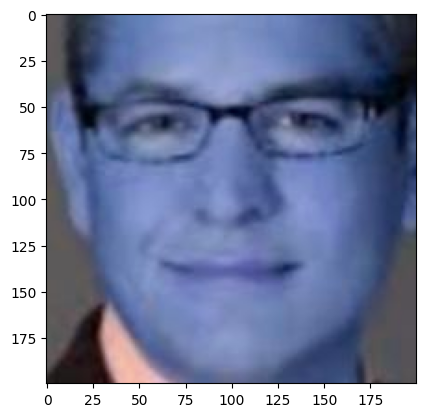

In [26]:
import matplotlib.pyplot as plt

plt.imshow(df['pixels'][0])
#print(df['pixels'][0])

0        [[[97, 92, 91], [97, 92, 91], [97, 91, 92], [9...
1        [[[237, 232, 229], [237, 232, 229], [236, 232,...
2        [[[29, 28, 37], [27, 26, 35], [26, 27, 37], [2...
3        [[[38, 93, 90], [38, 93, 90], [39, 94, 91], [3...
4        [[[255, 255, 255], [247, 247, 247], [252, 252,...
                               ...                        
23700    [[[231, 209, 203], [230, 208, 202], [229, 207,...
23701    [[[20, 37, 50], [18, 35, 48], [13, 30, 43], [7...
23702    [[[203, 170, 167], [202, 169, 166], [204, 169,...
23703    [[[51, 55, 80], [48, 53, 78], [50, 54, 83], [5...
23704    [[[44, 71, 105], [44, 71, 105], [46, 73, 107],...
Name: pixels, Length: 23705, dtype: object
0        [[[97, 92, 91], [97, 92, 91], [97, 91, 92], [9...
1        [[[237, 232, 229], [237, 232, 229], [236, 232,...
2        [[[29, 28, 37], [27, 26, 35], [26, 27, 37], [2...
3        [[[38, 93, 90], [38, 93, 90], [39, 94, 91], [3...
4        [[[255, 255, 255], [247, 247, 247], [252, 252,...
             

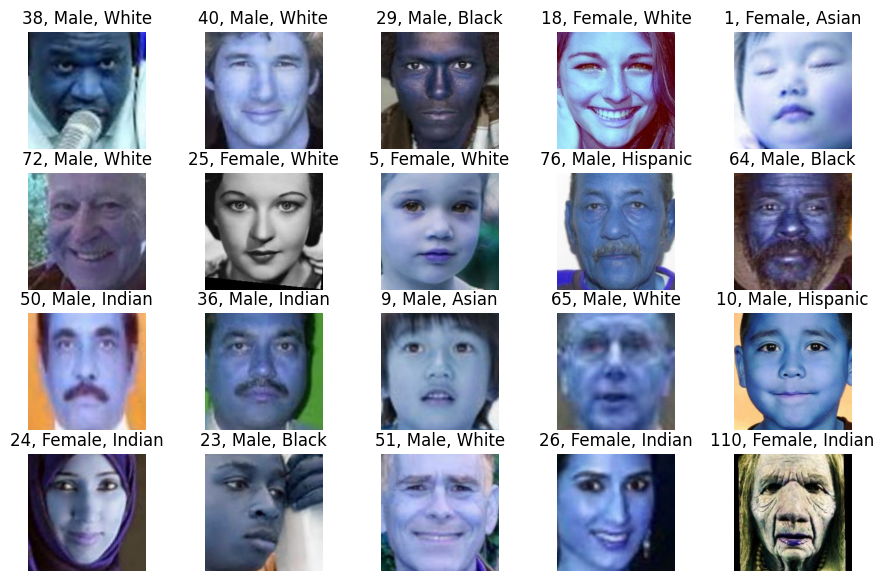

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

ethnicity_mapping = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}
gender_mapping = {0:"Male", 1:"Female"}
fig, axs = plt.subplots(4, 5, figsize=(11, 7))
plt.figure()
for row in range(4):
    for col in range(5):
        indice = np.random.randint(df.shape[0])
        print(df['pixels'])
        #for df['pixels'][indice]
        #    rgb = cv2.cvtColor()
        axs[row, col].imshow(df['pixels'][indice])
        axs[row, col].set_title(str(df['age'][indice])+', '+ gender_mapping[df['gender'][indice]]+', '+ethnicity_mapping[df['ethnicity'][indice]])
        axs[row, col].axis('off')
plt.show()

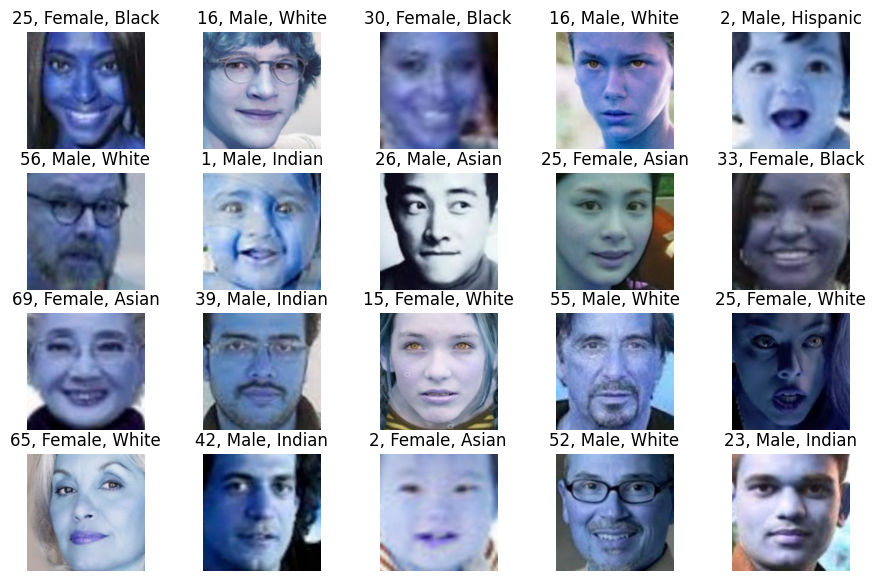

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

ethnicity_mapping = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}
gender_mapping = {0:"Male", 1:"Female"}
fig, axs = plt.subplots(4, 5, figsize=(11, 7))
plt.figure()
for row in range(4):
    for col in range(5):
        indice = np.random.randint(df.shape[0])
        print
        #for df
        #    rgb = cv2.cvtColor()
        axs[row, col].imshow(df['pixels'][indice], cmap='gray')
        axs[row, col].set_title(str(df['age'][indice])+', '+ gender_mapping[df['gender'][indice]]+', '+ethnicity_mapping[df['ethnicity'][indice]])
        axs[row, col].axis('off')
plt.show()

In [28]:
#On enlève les personnes de plus de 80 ans, peut créer un biais 
df = df[df['age'] < 80].reset_index(drop=True)

#On normalise les âges 
#max_age = df['age'].max()
#df['age'] = df['age']/max_age

## Prédicition de l'âge uniquement

La première chose à faire est de séparer notre jeu de données entre les images et la variable cible

In [29]:
X = np.array(df['pixels'].tolist())

y = df['age'].values

#On choisit que les 2000 premières pour que ça aille plus vite

X = X[:2000]
y = y[:2000]

In [30]:
y

array([40, 37, 39, ..., 35, 13, 51])

La on sépare nos données en un set d'entrainement et un set de test

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Et la boum on créé un modèle, c'est un modèle très classique avec des couches de convolutions successives (avec pooling et dropout, je pourrai t'expliquer à quoi ça correspond si tu veux). La couche de sortie est un seul neurone sans fonction d'activation pcq on est sur une régression (la pareil je pourrai t'expliquer un peu plus)

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


input_shape = (200,200,3)

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid', input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 98, 98, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 98, 98, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)       

On le compile, en choisissant bien la bonne fonction de perte (mean squared error pour une régression)

In [35]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Et on entraîne

In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                              epochs=10,  batch_size=32)

Epoch 1/10


2024-02-22 16:16:39.919711: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 192000000 exceeds 10% of free system memory.
2024-02-22 16:16:44.077746: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2024-02-22 16:16:44.744647: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


 1/50 [..............................] - ETA: 2:27 - loss: 14085.0371 - mae: 93.8870

2024-02-22 16:16:45.298246: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2024-02-22 16:16:45.879780: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


50/50 [==============================] - 46s 886ms/step - loss: 683821.9375 - mae: 241.1263 - val_loss: 787.0502 - val_mae: 23.8452
Epoch 2/10
50/50 [==============================] - 45s 898ms/step - loss: 573.0635 - mae: 18.7310 - val_loss: 671.5026 - val_mae: 21.7788
Epoch 3/10
50/50 [==============================] - 48s 952ms/step - loss: 492.8109 - mae: 17.6674 - val_loss: 712.7561 - val_mae: 22.5886
Epoch 4/10
50/50 [==============================] - 44s 885ms/step - loss: 464.5524 - mae: 16.8921 - val_loss: 710.8466 - val_mae: 22.5829
Epoch 5/10
50/50 [==============================] - 45s 897ms/step - loss: 430.8013 - mae: 16.3643 - val_loss: 586.7568 - val_mae: 20.2502
Epoch 6/10
50/50 [==============================] - 44s 879ms/step - loss: 401.6324 - mae: 15.8973 - val_loss: 651.9130 - val_mae: 21.3857
Epoch 7/10
50/50 [==============================] - 44s 883ms/step - loss: 400.8190 - mae: 15.7499 - val_loss: 609.4227 - val_mae: 20.4620
Epoch 8/10
50/50 [================

On voit que la fonction de perte descend globalement, mais c'est quand même pas dingue, on est de mieux en mieux sur le set d'entrainement mais pas le set de test, c'est un problème classique d'overfitting qui va faire qu'on aura du mal a généraliser (on aurait besoin de plus de données, de meilleures qualité, de plus d'epochs...) 
Résultats pas oufs mais c'est surtout pour comprendre comment ça marche 

On peut maintenant prédire l'âge des images correspondant à notre jeu de test

In [85]:
y_pred = model.predict(X_test)
y_pred

array([[1.42505732e+01],
       [1.50133133e+01],
       [1.46104765e+01],
       [1.15835590e+01],
       [3.88972807e+00],
       [3.32463303e+01],
       [1.71313801e+01],
       [1.65810547e+01],
       [6.53149509e+00],
       [2.00082264e+01],
       [1.79795437e+01],
       [1.75446072e+01],
       [1.45745983e+01],
       [1.75277710e+01],
       [2.12063122e+01],
       [7.78481865e+00],
       [5.37283325e+00],
       [2.31314754e+00],
       [2.17535138e+00],
       [1.00747814e+01],
       [1.90865726e+01],
       [1.01812105e+01],
       [2.82801914e+01],
       [6.76195812e+00],
       [7.75728421e-03],
       [2.60654378e+00],
       [2.71431866e+01],
       [3.22743988e+01],
       [1.56790571e+01],
       [7.99191141e+00],
       [2.41788273e+01],
       [3.87993860e+00],
       [2.05391598e+01],
       [1.34376850e+01],
       [2.42042294e+01],
       [3.43716164e+01],
       [8.57055950e+00],
       [3.18922043e+01],
       [1.19766760e+00],
       [5.48248243e+00],


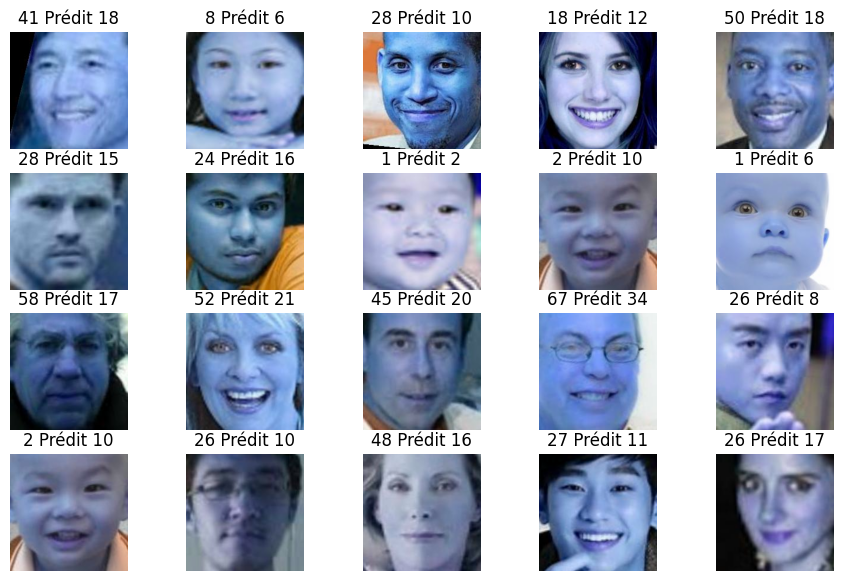

<Figure size 640x480 with 0 Axes>

In [87]:
fig, axs = plt.subplots(4, 5, figsize=(11, 7))


plt.figure()
for row in range(4):
    for col in range(5):
        indice = np.random.randint(X_test.shape[0])
        axs[row, col].imshow(X_test[indice], cmap="gray")
        axs[row, col].axis('off')
        axs[row, col].set_title('{} Prédit {}'.format(int(y_test[indice]), int(y_pred[indice][0])))
plt.show()